In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
!gdown https://drive.google.com/uc?id=1Ppx7kH7cLdDB5yXaIwEl5QTVhZwoR9y3 -O ./Full_GTD_Dataset_Full_Version.xlsx

Downloading...
From (original): https://drive.google.com/uc?id=1Ppx7kH7cLdDB5yXaIwEl5QTVhZwoR9y3
From (redirected): https://drive.google.com/uc?id=1Ppx7kH7cLdDB5yXaIwEl5QTVhZwoR9y3&confirm=t&uuid=a8f64115-b561-4b46-8b78-8dcac0197ad9
To: /content/Full_GTD_Dataset_Full_Version.xlsx
100% 107M/107M [00:02<00:00, 47.0MB/s]


### 칼럼 정제
1. nkillus, nwoundus, nhostkidus, ransomamtus, ransompaidus: 국제 테러에 대해 다루는 것이 목적. 미국 한정 칼럼은 제외
2. propvalue/propcomment: propextent,propextent_txt 컬럼과 중복되어 제거
3. 분석 대상이 아니라고 판단되는 칼럼 제외
  - compclaim: 테러 단체 간의 문제를 보이는 정보로, 분석 대상이 아니라고 판단되어 제거
  - divert/kidhijcountry: 납치하여 우회한 국가에 대한 정보로, 필요하지 않다고 판단되어 제거
4. 설명 컬럼 제거 (추후 참고용)
  - summary/motive/weapdetail/addnotes: 데이터 컬럼에 대한 설명
  - scite1/scite2/scite3/dbsource: 데이터에 대한 출처

In [ ]:
df = pd.read_excel('./Full_GTD_Dataset_Full_Version.xlsx')

In [ ]:
duplicates = df[df.duplicated()]

# 중복된 행 출력
print(duplicates)

Empty DataFrame
Columns: [eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, w

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214666 entries, 0 to 214665
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(54), int64(23), object(57)
memory usage: 221.1+ MB


In [ ]:
df = df.drop(columns = ['compclaim', 'propvalue', 'propcomment', 'divert', 'kidhijcountry', 'summary', 'motive', 'weapdetail', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'nkillus', 'nwoundus', 'nhostkidus', 'ransomamtus', 'ransompaidus'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214666 entries, 0 to 214665
Columns: 117 entries, eventid to related
dtypes: datetime64[ns](1), float64(47), int64(23), object(46)
memory usage: 191.6+ MB


In [ ]:
pd.set_option('display.max_columns', None)  # 출력되는 열의 개수 제한을 없애기
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt,ishostkid,nhostkid,nhours,ndays,ransom,ransomamt,ransompaid,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaT,101,Japan,4,East Asia,Fukouka,Fukouka,33.580412,130.396361,1.0,0,NaN,1,1,1,-9,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,0.0,Na

# **초기가설**

### [가설] 미국에서 테러가 많이 발생할 것이다.

In [ ]:
unique_countries = df['country_txt'].unique()
unique_countries

array(['Dominican Republic', 'Mexico', 'Philippines', 'Greece', 'Japan',
       'United States', 'Uruguay', 'Italy', 'East Germany (GDR)',
       'Ethiopia', 'Guatemala', 'Venezuela', 'West Germany (FRG)',
       'Switzerland', 'Jordan', 'Spain', 'Brazil', 'Egypt', 'Argentina',
       'Lebanon', 'Ireland', 'Turkey', 'Paraguay', 'Iran',
       'United Kingdom', 'Colombia', 'Bolivia', 'Nicaragua',
       'Netherlands', 'Belgium', 'Canada', 'Australia', 'Pakistan',
       'Zambia', 'Sweden', 'Costa Rica', 'South Yemen', 'Cambodia',
       'Israel', 'Poland', 'Taiwan', 'Panama', 'Kuwait',
       'West Bank and Gaza Strip', 'Austria', 'Czechoslovakia', 'India',
       'France', 'Brunei', 'Zaire', "People's Republic of the Congo",
       'Portugal', 'Algeria', 'El Salvador', 'Thailand', 'Haiti', 'Sudan',
       'Morocco', 'Cyprus', 'Myanmar', 'Afghanistan', 'Peru', 'Chile',
       'Honduras', 'Yugoslavia', 'Ecuador', 'New Zealand', 'Malaysia',
       'Singapore', 'Botswana', 'Jamaica', 'Chad

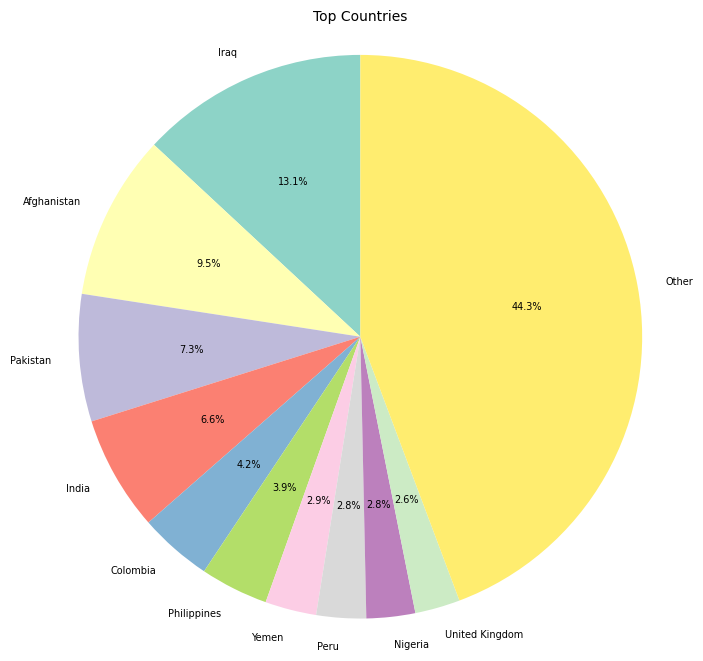

In [ ]:
country_sum = df['country_txt'].value_counts()

# 상위 10개의 고유값 선택
top_countries = country_sum.head(10)

# 나머지 값(194개 국가)을 'Other'로 묶어서 추가
other_countries_sum = country_sum.tail(len(country_sum) - 10).sum()

# 'Other'를 추가하여 top_countries 합치기
top_countries = pd.concat([top_countries, pd.Series({'Other': other_countries_sum})])

# 시각화 - 원판 차트
plt.figure(figsize=(8, 8))
top_countries.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3',fontsize=7)
plt.axis('equal')
plt.title('Top Countries', fontsize=10)
plt.ylabel('')  # y축 레이블 제거
plt.show()

In [ ]:
unique_regions = df['region_txt'].unique()
print(unique_regions)

['Central America & Caribbean' 'North America' 'Southeast Asia'
 'Western Europe' 'East Asia' 'South America' 'Eastern Europe'
 'Sub-Saharan Africa' 'Middle East & North Africa' 'Australasia & Oceania'
 'South Asia' 'Central Asia']


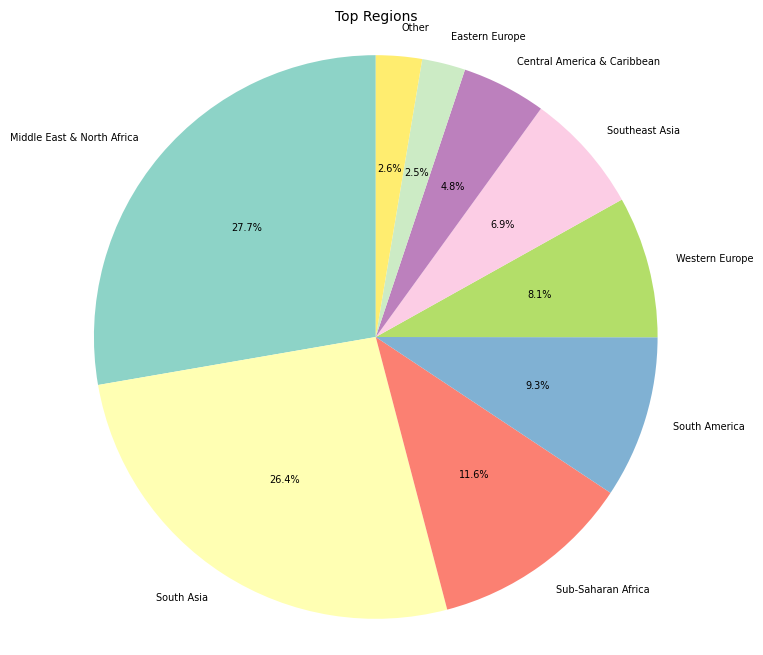

In [ ]:
region_sum = df['region_txt'].value_counts()

# 상위 8개의 고유값 선택
top_regions = region_sum.head(8)

# 나머지 값(4개 지역)을 'Other'로 묶어서 추가
other_regions_sum = region_sum.tail(len(region_sum) - 8).sum()

# 'Other'를 추가하여 top_regions 합치기
top_regions = pd.concat([top_regions, pd.Series({'Other': other_regions_sum})])

# 시각화 - 원판 차트
plt.figure(figsize=(8, 8))
top_regions.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Set3',fontsize=7)
plt.axis('equal')
plt.title('Top Regions', fontsize=10)
plt.ylabel('')  # y축 레이블 제거
plt.show()

GTD Codebook

1) Middle East & North Africa : <br>
Algeria, Bahrain, Egypt, Iran, Iraq, Israel, Jordan, Kuwait, Lebanon, Libya, Morocco, North
Yemen, Qatar, Saudi Arabia, South Yemen, Syria, Tunisia, Turkey, United Arab Emirates, West
Bank and Gaza Strip, Western Sahara, Yemen

2) South Asia : <br>
Afghanistan, Bangladesh, Bhutan, India, Maldives, Mauritius, Nepal, Pakistan, Sri Lanka

3) Sub-Saharan Africa : <br>
Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad,
Comoros, Democratic Republic of the Congo, Djibouti, Equatorial Guinea, Eritrea, Ethiopia,
Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Ivory Coast, Kenya, Lesotho, Liberia,
Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Nigeria, People's Republic
of the Congo, Republic of the Congo, Rhodesia, Rwanda, Senegal, Seychelles, Sierra Leone,
Somalia, South Africa, South Sudan, Sudan, Swaziland, Tanzania, Togo, Uganda, Zaire, Zambia,
Zimbabwe

4) South America : <br>
Argentina, Bolivia, Brazil, Chile, Colombia, Ecuador, Falkland Islands, French Guiana, Guyana,
Paraguay, Peru, Suriname, Uruguay, Venezuela

5) Western Europe : <br>
Andorra, Austria, Belgium, Cyprus, Denmark, Finland, France, Germany, Gibraltar, Greece,
Iceland, Ireland, Italy, Luxembourg, Malta, Netherlands, Norway, Portugal, Spain, Sweden,
Switzerland, United Kingdom, Vatican City, West Germany (FRG)

- 국가로 보았을 때 이라크, 아프가니스탄, 파키스탄, 인도 등 서/남아시아 국가들이 각각 5% 이상의 비중을 차지하며, 전체 204개국 중에서 큰 비율을 보인다. 테러가 빈번할 것으로 예상했던 미국은 Top10 안에도 들지 않은 것을 확인할 수 있었다. <br>
- 대륙으로 보았을 때 중동/북아프리카와 남아시아가 각각 25% 이상으로 특히 큰 비율을 보인다.

In [ ]:
# 테러가 가장 많이 발생하는 30개국의 수도(ChatGPT 도움)
capitals = [
    'Baghdad', 'Kabul', 'Islamabad', 'New Delhi', 'Bogota', 'Manila', 'Sanaa', 'Lima', 'Abuja', 'London',
    'Mogadishu', 'San Salvador', 'Ankara', 'Bangkok', 'Madrid', 'Washington', 'Damascus', 'Sri Jayawardanapura Kotte',
    'Paris', 'Algiers', 'Ramallah', 'Cairo', 'Santiago', 'Tripoli', 'Beirut', 'Jerusalem', 'Moscow', 'Pretoria',
    'Guatemala City', 'Managua', 'Tehran', 'Santo Domingo'
]

filtered = df[df['provstate'].isin(capitals)]
filtered

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
19,197001130001,1970,1,13,NaN,0,NaT,217,United States,1,North America,Washington,Seattle,47.610786,-122.331306,1.0,0,NaN,1/13/1970: Unknown perpetrators firebombed Fus...,1,1,1,0,NaN,NaN,0.0,1,0,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,1,Business,7.0,Retail/Grocery/Bakery,Fuson's Department Store,"Fuson's Department Store, Seattle Washington",217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black Nationalists,NaN,NaN,NaN,NaN,NaN,Retaliation for the store owner who shot and k...,0.0,NaN,NaN,0,-99.0,-99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Firebomb,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),17000.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The store was a White owned business operating...,Committee on Government Operations United Stat...,NaN,NaN,Hewitt Project,-9,-9,0,-9,NaN
22,197001190002,1970,1,19,NaN,0,NaT,217,United States,1,North America,Washington,Seattle,47.610786,-122.331306,1.0,0,Seattle University,1/17/1970: Three African Americans were suspec...,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,8,Educational Institution,49.0,School/University/Educational Building,Seattle University,"Liberal Arts and Garrand buildings, Seattle Un...",217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Black Nationalists,NaN,NaN,NaN,NaN,NaN,The incident took place during disturbances be...,1.0,NaN,NaN,0,3.0,-99.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),2200.0,Windows were shattered at the Liberal Arts and...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Witnesses observed three African American male...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Seattle University, ""1965-1975: Troubled Times...",Hewitt Project,-9,-9,0,-9,NaN
23,197001190003,1970,1,19,NaN,0,NaT,217,United States,1,North America,Washington,Seattle,47.610786,-122.331306,1.0,0,NaN,1/17/1970: Silas and Judith Bissell placed an ...,1,1,1,0,NaN,NaN,0.0,0,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,4,Military,28.0,Military Recruiting Station/Academy,R.O.T.C.,Air Force R.O.T.C. at the University of Washin...,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Student Radicals,NaN,NaN,NaN,NaN,NaN,The incident took place duri

### [가설] 테러의 목적은 주로 정치적인 이유(정부)일 것이다.
❗targtype 칼럼에서
intended targets(의도된 대상)과 incidental bystanders(사건에 의도치 않게 연루된 피해자)의 구분이 없음

In [ ]:
unique_target = df['targtype1_txt'].unique()
len(unique_target)

22

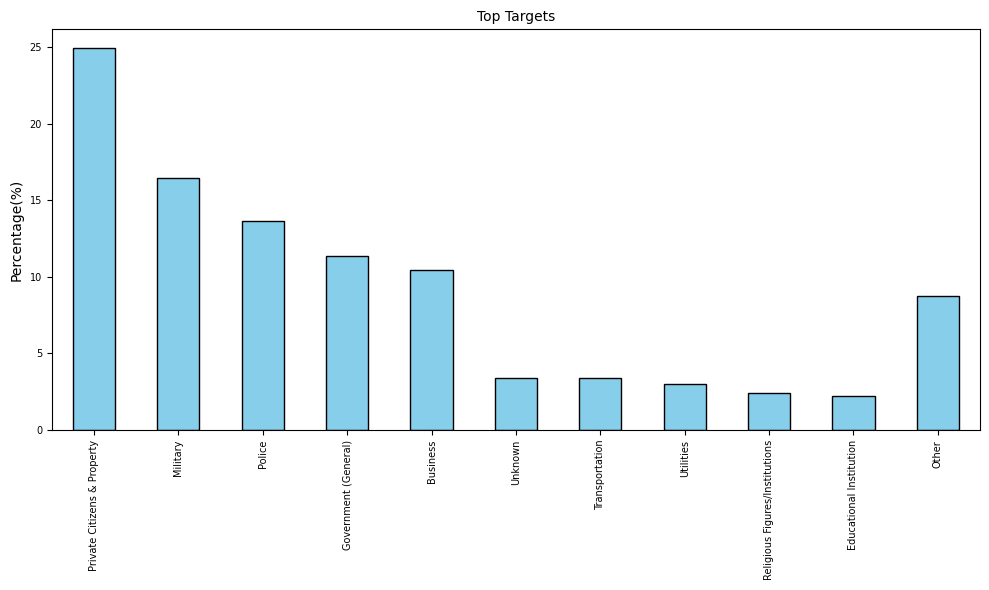

In [ ]:
target_sum = df['targtype1_txt'].value_counts(normalize=True)

# 상위 10개의 고유값 선택
top_targets = target_sum.head(10)

# 나머지 값(12개 타겟)을 'Other'로 묶어서 추가
other_targets_sum = target_sum.tail(len(target_sum) - 10).sum()

# 'Other'를 추가하여 top_targets 합치기
top_targets = pd.concat([top_targets, pd.Series({'Other': other_targets_sum})])
top_targets = top_targets * 100

# 시각화 - 막대 그래프
plt.figure(figsize=(10, 6))
top_targets.plot(kind='bar', fontsize=7, color='skyblue', edgecolor='black')
plt.title('Top Targets', fontsize=10)
plt.ylabel('Percentage(%)', fontsize=10)
plt.tight_layout()  # 레이아웃 조정 (레이블이 잘리지 않게)
plt.show()

### [의문] 국가별로 언제 테러가 많이 발생하였을까? - 이라크
- 테러 발생이 많은 국가의 연도를 파악하여 당시의 국가적, 세계적 배경을 먼저 알아보고자 함
- 가장 테러가 많았던 **이라크**로 필터링

In [ ]:
# 국가로 필터링
filtered_data = df[df['country_txt'] == 'Iraq'][['iyear','imonth','iday','country_txt','targtype1_txt']]
filtered_data.head()

,iyear,imonth,iday,country_txt,targtype1_txt
2853,1975,3,1,Iraq,Airports & Aircraft
4384,1976,12,15,Iraq,Airports & Aircraft
4392,1976,12,18,Iraq,Government (General)
4401,1976,12,24,Iraq,Violent Political Party
8687,1979,6,15,Iraq,Government (General)


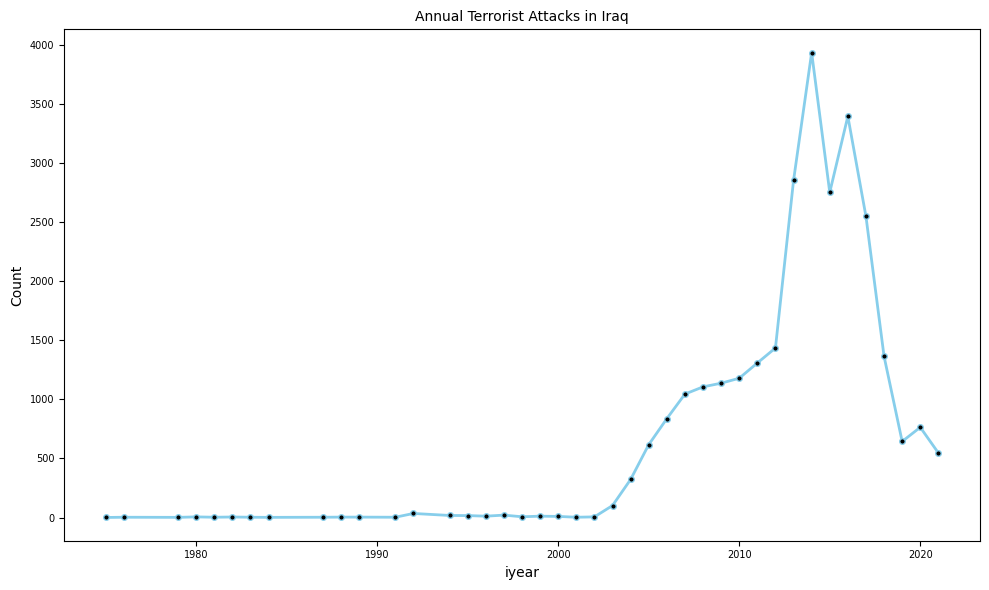

In [ ]:
data = filtered_data['iyear'].value_counts().sort_index()

# 시각화 - 막대 그래프
plt.figure(figsize=(10, 6))
data.plot(kind='line', marker='o', fontsize=7, color='skyblue', linewidth=2, markersize=4, markerfacecolor='black')  # 선 그래프
plt.title('Annual Terrorist Attacks in Iraq', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()  # 레이아웃 조정 (레이블이 잘리지 않게)
plt.show()

**2013년** 12월부터 2017년 12월까지 다양한 이라크 및 국제군이 IS에 맞서 무력 충돌을 벌임(이라크 내전)

→ 관련 CRU 보고서 : https://www.clingendael.org/pub/2021/eu-relevance-in-the-syrian-and-iraqi-civil-wars/4-tracing-the-evolution-of-the-iraqi-civil-war-20102020/

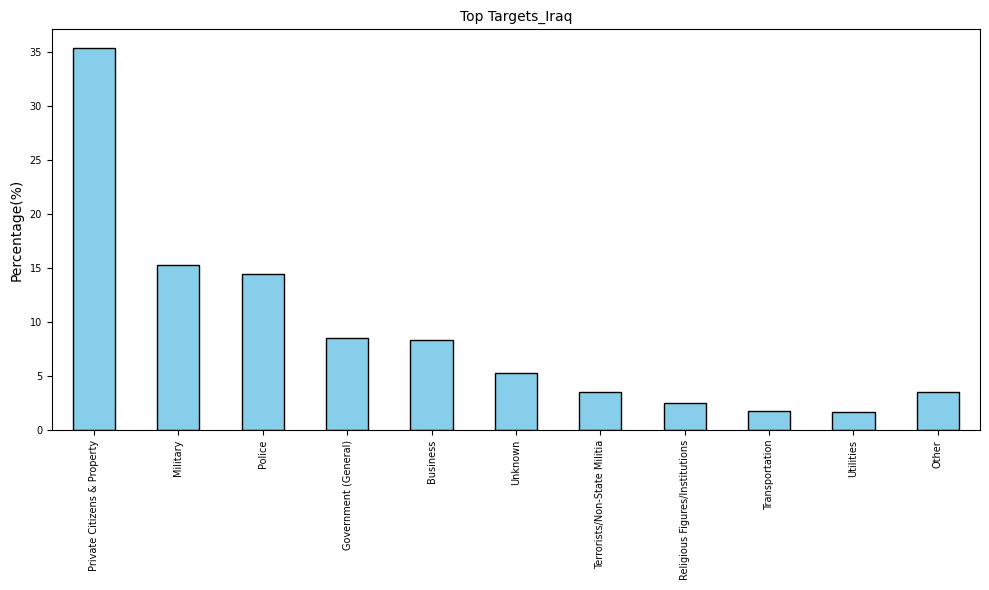

In [ ]:
target_sum = filtered_data['targtype1_txt'].value_counts(normalize=True)

# 상위 10개의 고유값 선택
top_targets = target_sum.head(10)

# 나머지 값(11개 타겟)을 'Other'로 묶어서 추가
other_targets_sum = target_sum.tail(len(target_sum) - 10).sum()

# 'Other'를 추가하여 top_targets 합치기
top_targets = pd.concat([top_targets, pd.Series({'Other': other_targets_sum})])
top_targets = top_targets * 100

# 시각화 - 막대 그래프
plt.figure(figsize=(10, 6))
top_targets.plot(kind='bar', fontsize=7, color='skyblue', edgecolor='black')
plt.title('Top Targets_Iraq', fontsize=10)
plt.ylabel('Percentage(%)', fontsize=10)
plt.tight_layout()  # 레이아웃 조정 (레이블이 잘리지 않게)
plt.show()

### [가설] 테러 목적에 맞는 테러 유형이 있을 것이다.

In [ ]:
unique_attacktype = df['attacktype1_txt'].unique()
print(unique_attacktype)

['Assassination' 'Hostage Taking (Kidnapping)' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Armed Assault' 'Hijacking' 'Unknown'
 'Unarmed Assault' 'Hostage Taking (Barricade Incident)']


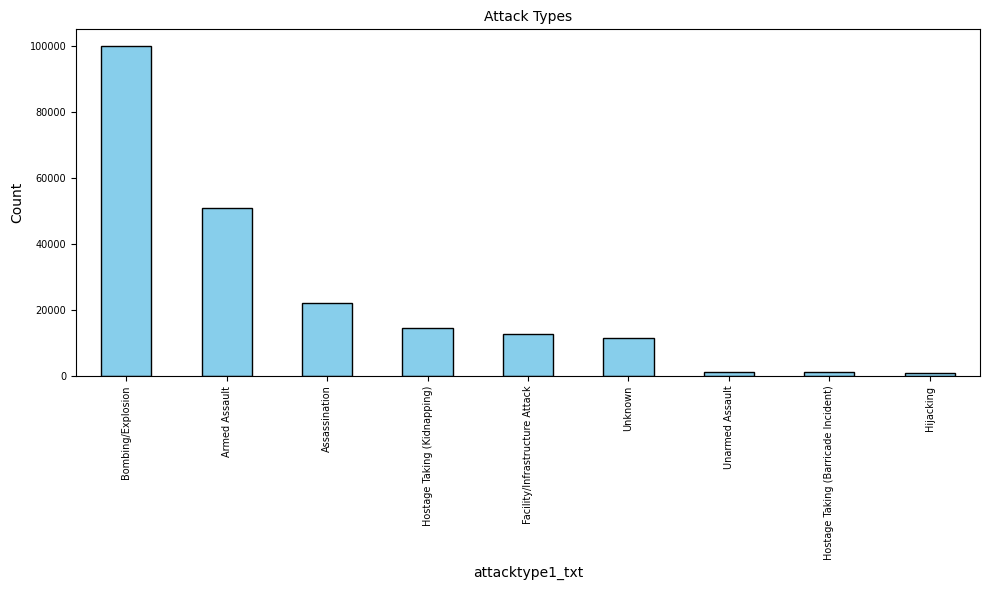

In [ ]:
attacktype_sum = df['attacktype1_txt'].value_counts()

# 시각화 - 막대 그래프
plt.figure(figsize=(10, 6))
attacktype_sum.plot(kind='bar', fontsize=7, color='skyblue', edgecolor='black')
plt.title('Attack Types', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.tight_layout()  # 레이아웃 조정 (레이블이 잘리지 않게)
plt.show()

In [ ]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2, p, dof, expected = chi2_contingency(confusion_matrix)
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(k-1, r-1))

# 'attacktype1'과 'targtype1' 컬럼이 각각 범주형이므로
confusion_matrix = pd.crosstab(df['attacktype1'], df['targtype1'])

# 크래머의 V 값 계산
cramers_v_value = cramers_v(confusion_matrix.values)

print(f"크래머의 V: {cramers_v_value}")

크래머의 V: 0.21351336057622708


- 테러 목적과 유형은 유의미한 상관관계를 보이지 않는다.

### [의문] 테러 유형에 따른 사망자 수

In [ ]:
# 'attacktype1_txt' 컬럼으로 그룹화하여 'nkill'과 'nwound'의 합계를 계산
grouped = df.groupby('attacktype1_txt')[['nkill', 'nwound']].sum().reset_index()
grouped

,attacktype1_txt,nkill,nwound
0,Armed Assault,186919.0,91316.0
1,Assassination,28187.0,16714.0
2,Bombing/Explosion,176655.0,406022.0
3,Facility/Infrastructure Attack,4664.0,4230.0
4,Hijacking,3782.0,22449.0
5,Hostage Taking (Barricade Incident),5102.0,4742.0
6,Hostage Taking (Kidnapping),33694.0,9521.0
7,Unarmed Assault,956.0,14851.0
8,Unknown,50934.0,24094.0


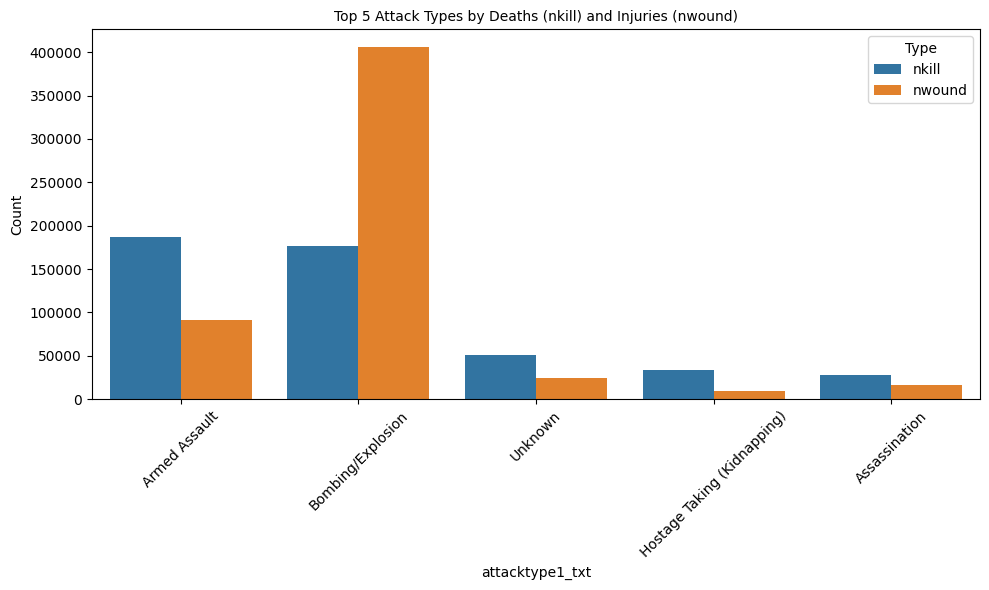

In [ ]:
import seaborn as sns

# 상위 5개 그룹만 선택 (사망자 합계 기준)
top5 = grouped.sort_values(by='nkill', ascending=False).head(5)

# 그래프 설정
plt.figure(figsize=(10, 6))

# 두 가지를 나란히 보도록 'nkill'과 'nwound'를 각각 막대그래프로 표시
top5_melted = top5.melt(id_vars='attacktype1_txt', value_vars=['nkill', 'nwound'],
                        var_name='type', value_name='count')

sns.barplot(x='attacktype1_txt', y='count', hue='type', data=top5_melted)

# 그래프 제목 및 레이블 설정
plt.title('Top 5 Attack Types by Deaths (nkill) and Injuries (nwound)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=45)
plt.legend(title='Type')

# 그래프 출력
plt.tight_layout()
plt.show()

### [의문] 인질극 외에 24시간 넘게 지속되는 테러 유형

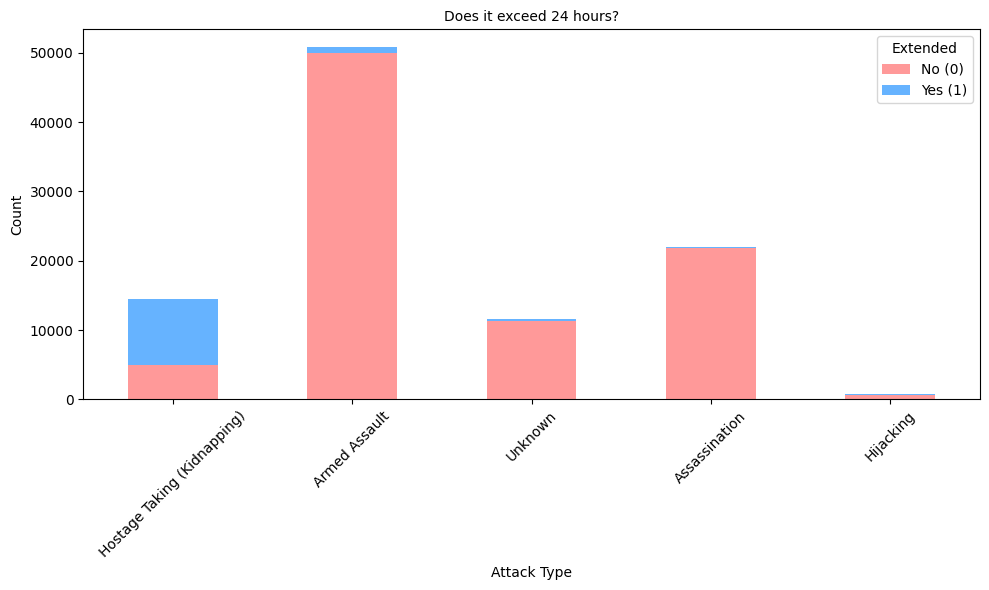

In [ ]:
# 'attacktype1_txt'와 'extended'로 그룹화하여 count
grouped = df.groupby(['attacktype1_txt', 'extended']).size().unstack(fill_value=0)

# 'extended' 값이 1인 경우의 합계 계산
extended_1_count = grouped[1]

# 'extended'가 1인 값이 많은 상위 5개 공격 유형 선택
top5_attacktypes = extended_1_count.sort_values(ascending=False).head(5).index

# 상위 5개 공격 유형에 대한 데이터만 추출
top5_grouped = grouped.loc[top5_attacktypes]

# 스택형 막대 그래프 그리기
top5_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#ff9999', '#66b3ff'])

# 그래프 제목 및 레이블 설정
plt.title('Does it exceed 24 hours?', fontsize=10)
plt.xlabel('Attack Type', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=45)
plt.legend(title='Extended', labels=['No (0)', 'Yes (1)'])

# 그래프 출력
plt.tight_layout()
plt.show()

## ※ 테러가 확실한 경우만 추출

In [ ]:
filtered_df = df[df['doubtterr'] == 0]
filtered_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,nkill,nkillter,nwound,nwoundte,property,propextent,propextent_txt,ishostkid,nhostkid,nhours,ndays,ransom,ransomamt,ransompaid,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaT,58,Dominican Republic,2,Central America & Caribbean,National,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaT,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,1,1,1,0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,0,NaN,NaN,1.0,1.0,NaN,NaN,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaT,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,1,1,1,0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaT,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,1,1,1,0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,-9,-9,1,1,NaN
5,197001010002,1970,1,1,NaN,0,NaT,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN,1,1,1,0,NaN,NaN,0.0,1,0,2,Armed Assault,NaN,NaN,NaN,NaN,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
filtered_df.info()  # 데이터 214666개에서 164407개로 감소

<class 'pandas.core.frame.DataFrame'>
Index: 164407 entries, 0 to 214664
Columns: 117 entries, eventid to related
dtypes: datetime64[ns](1), float64(47), int64(23), object(46)
memory usage: 148.0+ MB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214666 entries, 0 to 214665
Columns: 117 entries, eventid to related
dtypes: datetime64[ns](1), float64(47), int64(23), object(46)
memory usage: 191.6+ MB


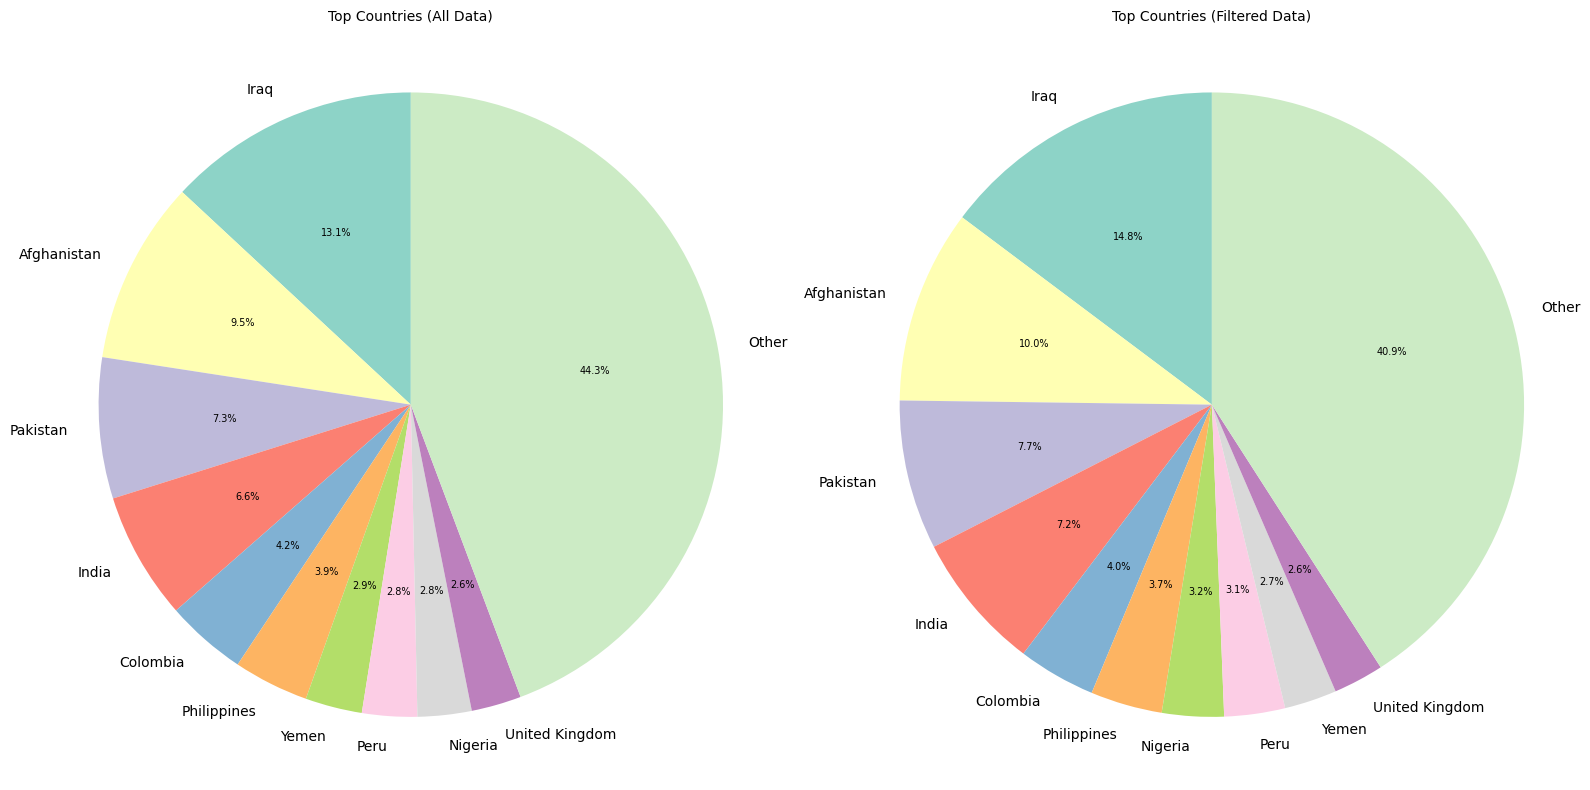

In [ ]:
# 첫 번째 원판 차트 (전체 데이터)
country_sum = df['country_txt'].value_counts()
top_countries = country_sum.head(10)
other_countries_sum = country_sum.tail(len(country_sum) - 10).sum()
top_countries = pd.concat([top_countries, pd.Series({'Other': other_countries_sum})])

# 두 번째 원판 차트 (필터된 데이터)
country_sum2 = filtered_df['country_txt'].value_counts()
top_countries2 = country_sum2.head(10)
other_countries_sum2 = country_sum2.tail(len(country_sum2) - 10).sum()
top_countries2 = pd.concat([top_countries2, pd.Series({'Other': other_countries_sum2})])

# 색상 팔레트 설정
colors = plt.get_cmap('Set3').colors

# 서브플롯 설정
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# 첫 번째 차트
wedges1, texts1, autotexts1 = axes[0].pie(top_countries, autopct='%1.1f%%', startangle=90, colors=colors, labels=top_countries.index)
axes[0].axis('equal')
axes[0].set_title('Top Countries (All Data)', fontsize=10)
axes[0].set_ylabel('')

# 두 번째 차트
wedges2, texts2, autotexts2 = axes[1].pie(top_countries2, autopct='%1.1f%%', startangle=90, colors=colors, labels=top_countries2.index)
axes[1].axis('equal')
axes[1].set_title('Top Countries (Filtered Data)', fontsize=10)
axes[1].set_ylabel('')

# 폰트 사이즈 설정
for autotext in autotexts1 + autotexts2:
    autotext.set_fontsize(7)

plt.tight_layout()
plt.show()

예멘, 콜롬비아, 필리핀이 소폭 감소를 보이는데 필터링한 데이터에 대하여 이러한 감소가 무언가 유의미한 사실을 나타내는가? (증감에 대한 해석을 어떻게 해야할지??) / 국가적 상황과 연관지어도 되는게 맞을까?? (ex.예멘은 2014년에 내전 발생)

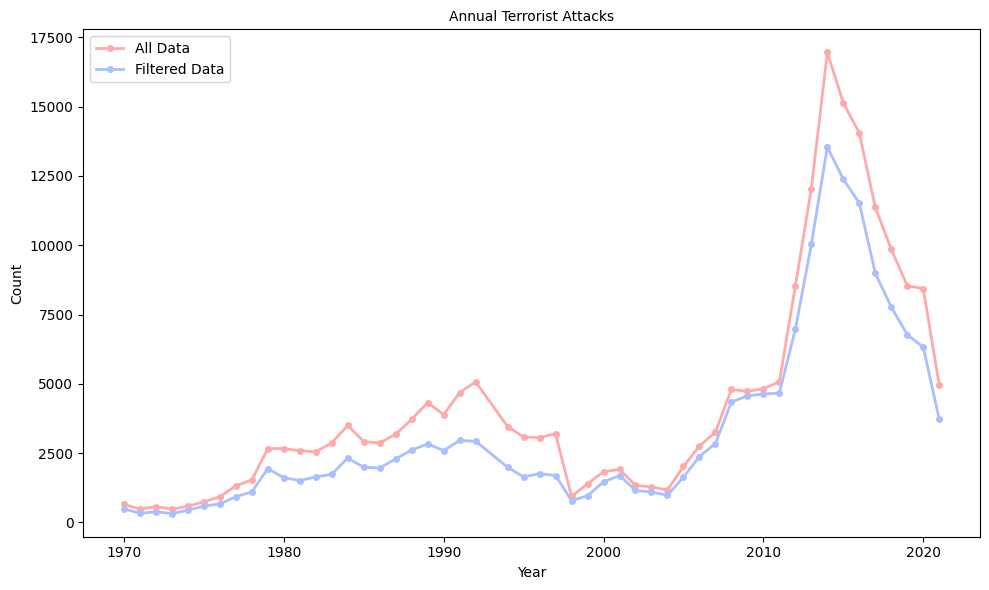

In [ ]:
# 전체 데이터에서 연도별 테러 공격 횟수
dataa = df['iyear'].value_counts().sort_index()

# 필터된 데이터에서 연도별 테러 공격 횟수
data_filtered = filtered_df['iyear'].value_counts().sort_index()

# 파스텔톤 색상 지정
pastel_red = '#FFAAAA'  # 연한 빨간색
pastel_blue = '#AABFFF'  # 연한 파란색

# 시각화 - 선 그래프
plt.figure(figsize=(10, 6))

# 첫 번째 선 그래프 (전체 데이터, 파스텔 빨간색)
plt.plot(dataa.index, dataa.values, marker='o', color=pastel_red, linewidth=2, markersize=4, label='All Data')

# 두 번째 선 그래프 (필터된 데이터, 파스텔 파란색)
plt.plot(data_filtered.index, data_filtered.values, marker='o', color=pastel_blue, linewidth=2, markersize=4, label='Filtered Data')

plt.title('Annual Terrorist Attacks', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.legend()  # 범례 추가
plt.tight_layout()
plt.show()

In [ ]:
target_sum = df['targtype1_txt'].value_counts()
target_sum2 = filtered_df['targtype1_txt'].value_counts()

combined_target_sum = pd.DataFrame({
    'All Data': target_sum,
    'Filtered Data': target_sum2
})

combined_target_sum = combined_target_sum.sort_values(by='All Data', ascending=False)
combined_target_sum

,All Data,Filtered Data
targtype1_txt,,
Private Citizens & Property,53487,46981
Military,35292,5604
Police,29236,26741
Government (General),24355,22683
Business,22412,17651
Unknown,7351,6958
Transportation,7241,6449
Utilities,6424,6277
Religious Figures/Institutions,5191,4747


<Figure size 1000x600 with 0 Axes>

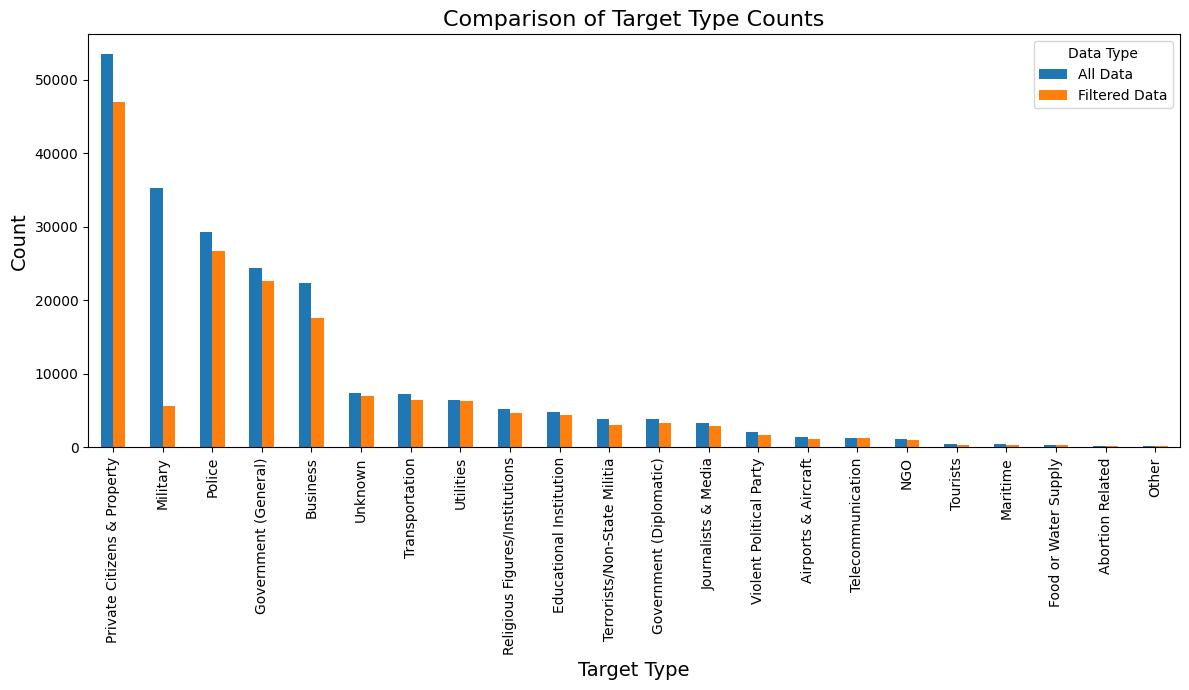

In [ ]:
# combined_target_sum을 시각화
plt.figure(figsize=(10, 6))

# 막대그래프 그리기
combined_target_sum.plot(kind='bar', stacked=False, figsize=(12, 7))

# 그래프 제목과 레이블 추가
plt.title('Comparison of Target Type Counts', fontsize=16)
plt.xlabel('Target Type', fontsize=14)
plt.ylabel('Count', fontsize=14)

# 범례 추가
plt.legend(title='Data Type')

# 그래프 출력
plt.tight_layout()
plt.show()

(ChatGPT 참고)

1. 군인 피해자가 대부분 의심스러운 사건에 포함되었을 가능성

- 군인 피해자 수가 줄어든 이유는 원본 데이터에서 군인 피해자가 포함된 사건들이 테러와 구별된 의심스러운 사건으로 포함되었을 가능성이 있다는 것입니다. 예를 들어, 군인들이 포함된 사건이 군사적 충돌이나 내전 등 정치적/군사적 상황에서 발생했을 수 있습니다. 이런 사건들은 테러리스트 공격으로 분류되지 않거나 제외될 수 있기 때문에 군인 피해자 수가 줄어든 것으로 볼 수 있습니다.

2. 확실한 테러는 민간인에 대한 공격이 많다

- 군인 피해자 수가 줄어든 것은 확실한 테러에서 민간인 피해가 더 많다는 것을 의미할 수 있습니다. 테러리스트들은 종종 민간인을 공격 대상으로 삼고, 군인보다는 민간인 대상 공격이 더 빈번할 수 있기 때문입니다. 따라서 확실한 테러만 포함한 경우 군인 피해자 수가 상대적으로 적게 나타날 수 있다는 해석이 가능합니다.

3. 군인 피해자의 정의와 구분

- 군인 피해자 수가 많이 줄어든 것은 "확실한 테러"를 정의하는 기준이 군인 피해자를 구체적으로 제외했거나, 군인 피해자의 정의가 엄격하게 적용되었기 때문일 수 있습니다. 예를 들어, 군인 피해자가 군사 작전이나 내전 상황에서 발생한 피해로 간주되어 테러와 구분되었을 가능성도 있습니다.

4. 테러리스트와 군인 간의 경계

- 군인 피해자가 적게 나타난 것은 군대와 테러리스트 간의 구분이 명확하게 이루어졌다는 의미일 수 있습니다. 예를 들어, 군대 간 충돌이나 군사적 작전은 테러와 구별되기 때문에 군인 피해자가 줄어들 수 있는 해석이 가능합니다.

5. 테러 활동의 변화

- 군인 피해자 수가 줄어든 것은 테러 활동의 양상이 변화했기 때문일 수도 있습니다. 예전에는 군인이나 군사적 목표가 주요 타겟이었을 수 있지만, 시간이 지나면서 테러리스트들의 목표가 민간인으로 변화했을 가능성이 있습니다. 따라서 민간인 대상 공격이 테러에서 더 빈번하게 발생하면서 군인 피해자 수가 감소했을 수 있습니다.

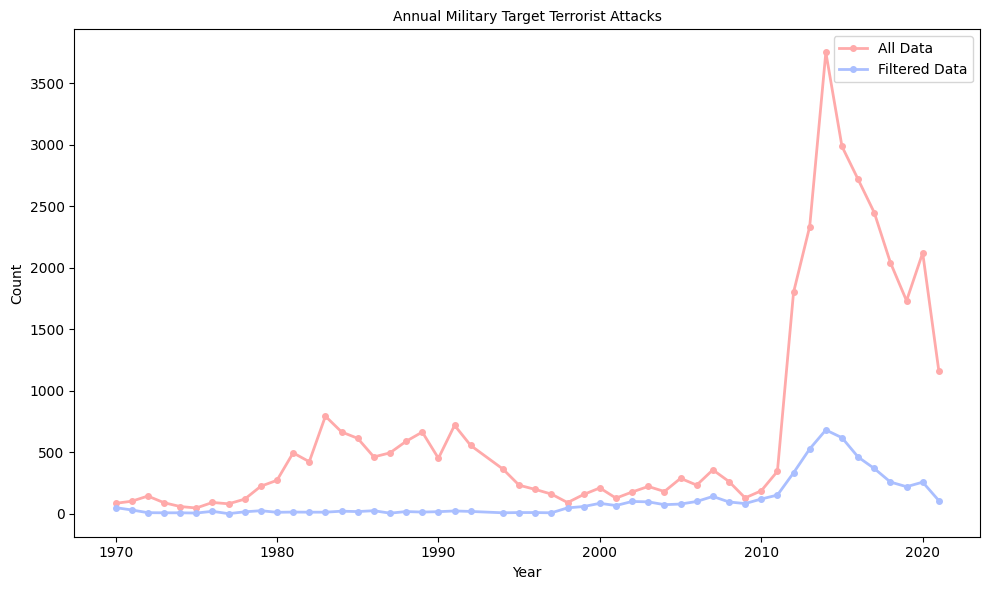

In [ ]:
# 전체 데이터에서 'Military' 타겟에 해당하는 연도별 테러 공격 횟수
military_dataa = df[df['targtype1_txt'] == 'Military']['iyear'].value_counts().sort_index()

# 필터된 데이터에서 'Military' 타겟에 해당하는 연도별 테러 공격 횟수
military_data = filtered_df[filtered_df['targtype1_txt'] == 'Military']['iyear'].value_counts().sort_index()

# 파스텔톤 색상 지정
pastel_red = '#FFAAAA'  # 연한 빨간색
pastel_blue = '#AABFFF'  # 연한 파란색

# 시각화 - 선 그래프
plt.figure(figsize=(10, 6))

# 첫 번째 선 그래프 (전체 데이터, 파스텔 빨간색)
plt.plot(military_dataa.index, military_dataa.values, marker='o', color=pastel_red, linewidth=2, markersize=4, label='All Data')

# 두 번째 선 그래프 (필터된 데이터, 파스텔 파란색)
plt.plot(military_data.index, military_data.values, marker='o', color=pastel_blue, linewidth=2, markersize=4, label='Filtered Data')

plt.title('Annual Military Target Terrorist Attacks', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.legend()  # 범례 추가
plt.tight_layout()
plt.show()

### [과제] 테러가 확실한지 의심되는 경우, 어떤 유형이 많은지 확인

In [ ]:
unique_alternative = df['alternative_txt'].unique()
alternative_counts = df['alternative_txt'].value_counts()
alternative_counts

,count
alternative_txt,
Insurgency/Guerilla Action,29858
Other Crime Type,4100
Intra/Inter-group Conflict,1451
Lack of Intentionality,580
State Actors,499


(번역 및 해설 ChatGPT 참고)

1. Insurgency/Guerilla Action = 반란/게릴라 활동
- 반란(Insurgency)은 정부에 대한 폭력적인 저항 운동이며, 게릴라 활동(Guerilla Action)은 비정규 군사 전술을 사용하여 군대나 정부의 힘에 대항하는 활동을 말합니다. 이는 공식적인 군대와 대적하는 작은 규모의 비정규 전투나 공격을 포함합니다.

2. Other Crime Type = 기타 범죄 유형
- 이 항목은 테러와 관련된 다른 특정 범죄 유형에 해당하지 않는, 그러나 폭력적인 범죄 행위들을 포함하는 카테고리입니다. 예를 들어, 일반적인 범죄나 테러의 목적과 관련되지 않은 범죄 등이 포함될 수 있습니다.

3. Inter/Intra-Group Conflict = 집단 간/내부 갈등
- Inter-group Conflict는 서로 다른 집단들 간의 갈등을 의미합니다. 예를 들어, 두 민족이나 국가 간의 충돌.
Intra-group Conflict는 같은 집단 내에서 발생하는 갈등을 의미합니다. 예를 들어, 동일한 민족 내에서의 분쟁이나 정치적 차이로 발생하는 내부 충돌을 포함합니다.

4. Lack of Intentionality = 고의성 부족
- 특정 행위가 고의적이지 않거나 의도가 없음을 의미합니다. 예를 들어, 특정 테러 사건이 계획되지 않았거나 우발적으로 발생한 경우를 나타냅니다. 행위자에게 특정 목적이나 의도가 결여되어 있는 경우입니다.

5. State Actors (systematically coded post-2012) = 국가 행위자들 (2012년 이후 체계적으로 분류됨)
- 국가 행위자(State Actors)는 정부나 군대와 같은 공식적인 국가 기관이 주도하는 폭력적 활동을 의미합니다. 2012년 이후, 이러한 행위는 체계적으로 분류되고 기록됩니다. 이는 국가나 정부 기관이 테러나 폭력적인 활동을 일으키거나 지원하는 상황을 나타냅니다.

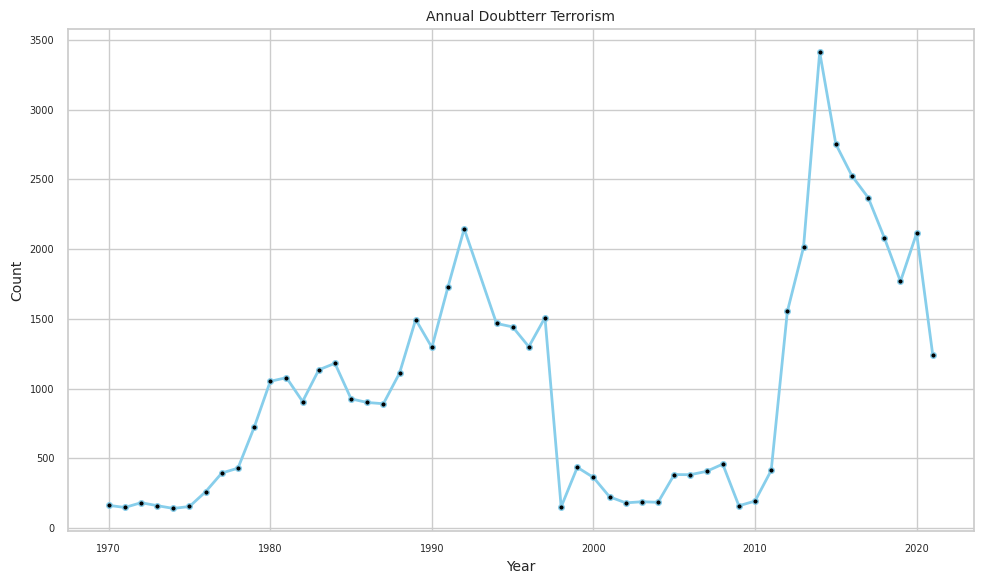

In [ ]:
# 테러인지 불확실한 건 필터링
doubtterr_df = df[(df['doubtterr'] == 1) | (df['doubtterr'] == -9)]

# 'iyear'로 그룹화하여 연도별 카운트 계산
annual_doubtterr = doubtterr_df.groupby('iyear').size()

# 시각화 - 선 그래프
plt.figure(figsize=(10, 6))
annual_doubtterr.plot(kind='line', marker='o', fontsize=7, color='skyblue', linewidth=2, markersize=4, markerfacecolor='black')
plt.title('Annual Doubtterr Terrorism', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

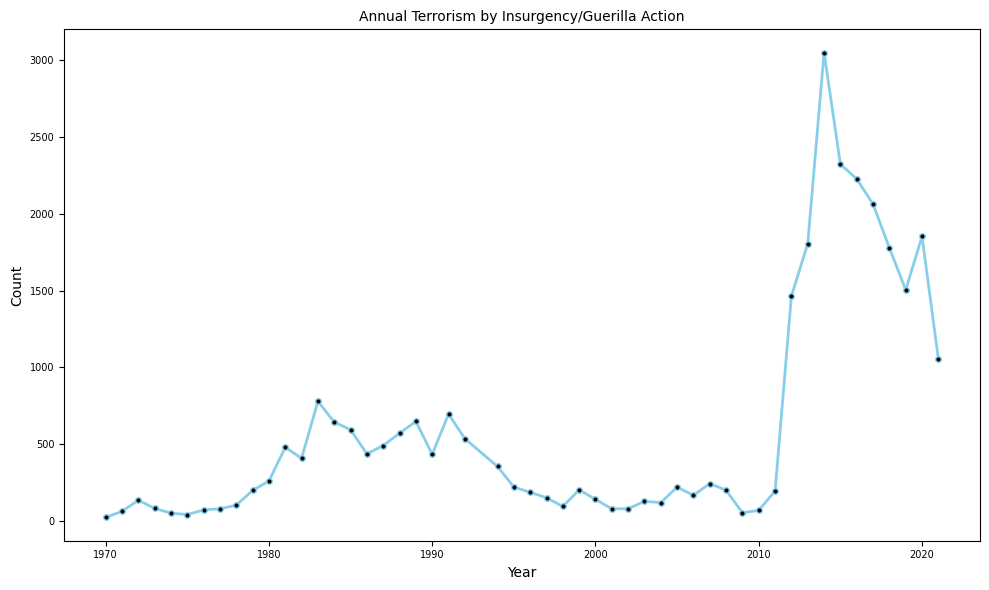

In [ ]:
# 'alternative_txt'가 'Insurgency/Guerilla Action'인 데이터 필터링
state_actors_df = df[df['alternative_txt'] == 'Insurgency/Guerilla Action']

# 'iyear'로 그룹화하여 연도별 카운트 계산
annual_state_actors = state_actors_df.groupby('iyear').size()

# 시각화 - 선 그래프
plt.figure(figsize=(10, 6))
annual_state_actors.plot(kind='line', marker='o', fontsize=7, color='skyblue', linewidth=2, markersize=4, markerfacecolor='black')
plt.title('Annual Terrorism by Insurgency/Guerilla Action', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

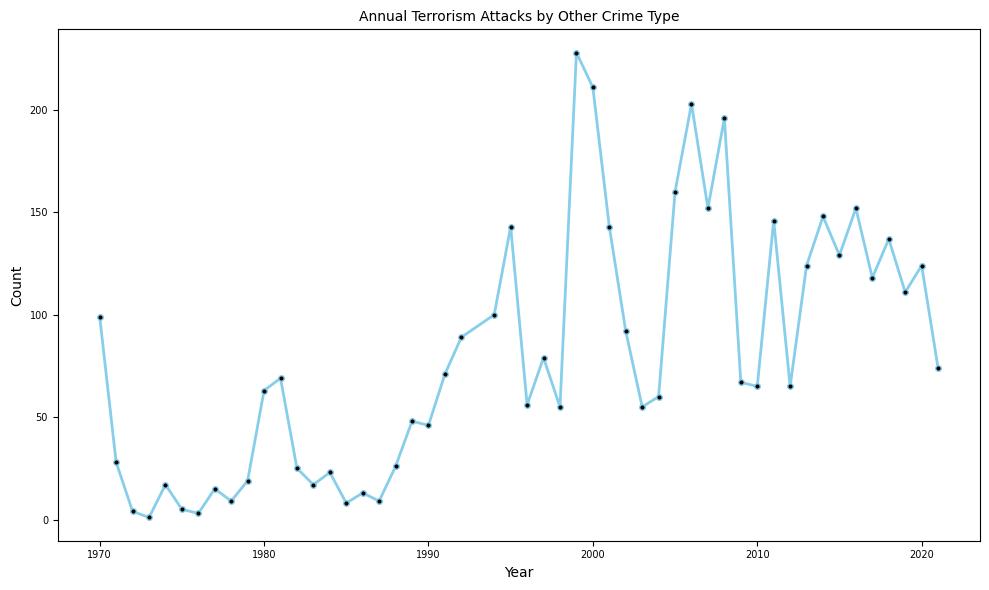

In [ ]:
# 'alternative_txt'가 'Other Crime Type'인 데이터 필터링
crime_df = df[df['alternative_txt'] == 'Other Crime Type']

# 'iyear'로 그룹화하여 연도별 카운트 계산
annual_crime = crime_df.groupby('iyear').size()

# 시각화 - 선 그래프
plt.figure(figsize=(10, 6))
annual_crime.plot(kind='line', marker='o', fontsize=7, color='skyblue', linewidth=2, markersize=4, markerfacecolor='black')
plt.title('Annual Terrorism Attacks by Other Crime Type', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

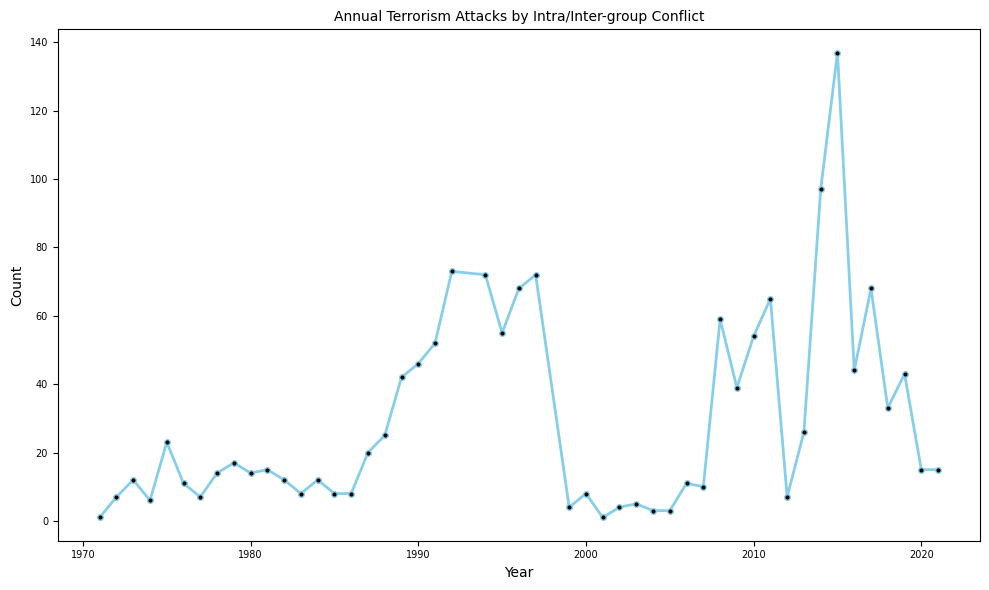

In [ ]:
# 'alternative_txt'가 'Intra/Inter-group Conflict'인 데이터 필터링
conflict_df = df[df['alternative_txt'] == 'Intra/Inter-group Conflict']

# 'iyear'로 그룹화하여 연도별 카운트 계산
annual_conflict = conflict_df.groupby('iyear').size()

# 시각화 - 선 그래프
plt.figure(figsize=(10, 6))
annual_conflict.plot(kind='line', marker='o', fontsize=7, color='skyblue', linewidth=2, markersize=4, markerfacecolor='black')
plt.title('Annual Terrorism Attacks by Intra/Inter-group Conflict', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

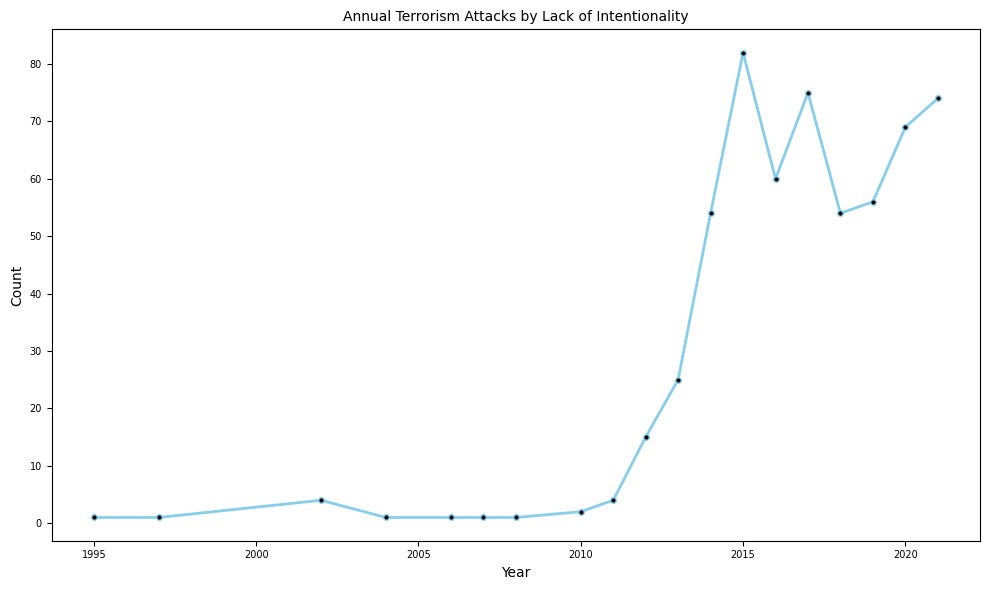

In [ ]:
# 'alternative_txt'가 'Lack of Intentionality'인 데이터 필터링
intentionality_df = df[df['alternative_txt'] == 'Lack of Intentionality']

# 'iyear'로 그룹화하여 연도별 카운트 계산
annual_intentionality = intentionality_df.groupby('iyear').size()

# 시각화 - 선 그래프
plt.figure(figsize=(10, 6))
annual_intentionality.plot(kind='line', marker='o', fontsize=7, color='skyblue', linewidth=2, markersize=4, markerfacecolor='black')
plt.title('Annual Terrorism Attacks by Lack of Intentionality', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

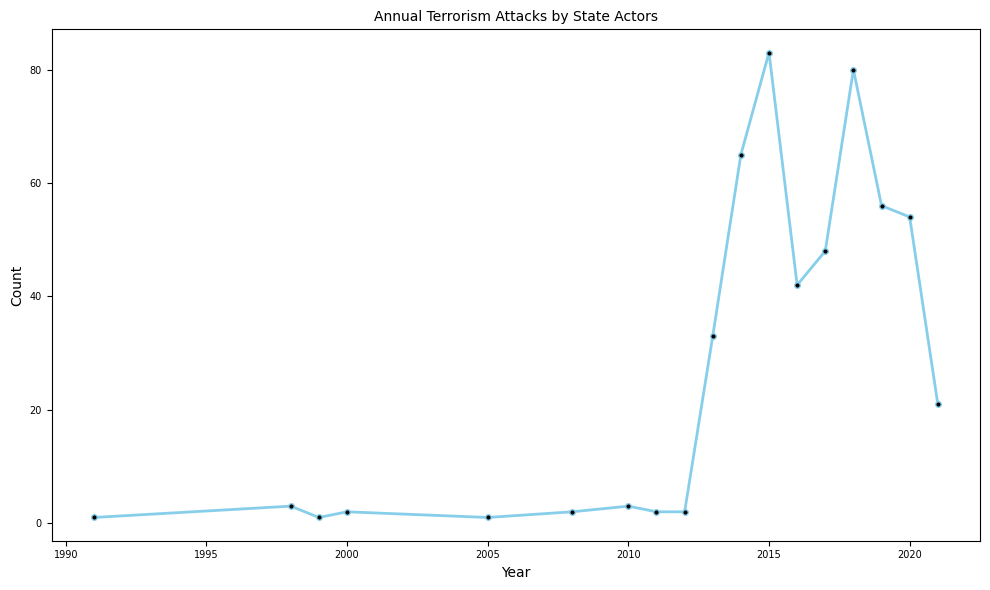

In [ ]:
# 'alternative_txt'가 'State Actors'인 데이터 필터링
state_actors_df = df[df['alternative_txt'] == 'State Actors']

# 'iyear'로 그룹화하여 연도별 카운트 계산
annual_state_actors = state_actors_df.groupby('iyear').size()

# 시각화 - 선 그래프
plt.figure(figsize=(10, 6))
annual_state_actors.plot(kind='line', marker='o', fontsize=7, color='skyblue', linewidth=2, markersize=4, markerfacecolor='black')
plt.title('Annual Terrorism Attacks by State Actors', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# military_dataa (군사 타겟 공격 횟수)
military_dataa = df[df['targtype1_txt'] == 'Military']['iyear'].value_counts().sort_index()

# doubtterr_df (불확실한 테러 횟수)
doubtterr_df = df[(df['doubtterr'] == 1) | (df['doubtterr'] == -9)]
annual_doubtterr = doubtterr_df.groupby('iyear').size()

# 두 데이터프레임을 'iyear' 기준으로 병합
combined_data = pd.DataFrame({
    'Military Attacks': military_dataa,
    'Doubtterr Attacks': annual_doubtterr
}).fillna(0)  # NaN 값은 0으로 채움

# Pearson 상관계수 계산
correlation = combined_data.corr().iloc[0, 1]

print(f"The correlation coefficient between Military Attacks and Doubtterr Attacks is: {correlation}")

The correlation coefficient between Military Attacks and Doubtterr Attacks is: 0.8696957083948493


In [ ]:
# military_dataa (군사 타겟 공격 횟수)
military_dataa = df[df['targtype1_txt'] == 'Military']['iyear'].value_counts().sort_index()

# insurgency_df (반란/게릴라 활동에 의한 테러 공격 횟수)
insurgency_df = df[df['alternative_txt'] == 'Insurgency/Guerilla Action']
annual_insurgency = insurgency_df.groupby('iyear').size()

# 두 데이터프레임을 'iyear' 기준으로 병합
combined_data = pd.DataFrame({
    'Military Attacks': military_dataa,
    'Insurgency/Guerilla Attacks': annual_insurgency
}).fillna(0)  # NaN 값은 0으로 채움

# Pearson 상관계수 계산
correlation = combined_data.corr().iloc[0, 1]

print(f"The correlation coefficient between Military Attacks and Insurgency/Guerilla Action Attacks is: {correlation}")

The correlation coefficient between Military Attacks and Insurgency/Guerilla Action Attacks is: 0.9962692258473923


In [ ]:
# military_dataa (군사 타겟 공격 횟수)
military_dataa = df[df['targtype1_txt'] == 'Military']['iyear'].value_counts().sort_index()

# crime_df (기타 범죄 유형에 의한 테러 공격 횟수)
crime_df = df[df['alternative_txt'] == 'Other Crime Type']
annual_crime = crime_df.groupby('iyear').size()

# 두 데이터프레임을 'iyear' 기준으로 병합
combined_data = pd.DataFrame({
    'Military Attacks': military_dataa,
    'Other Crime Type Attacks': annual_crime
}).fillna(0)  # NaN 값은 0으로 채움

# Pearson 상관계수 계산
correlation = combined_data.corr().iloc[0, 1]

print(f"The correlation coefficient between Military Attacks and Other Crime Type Attacks is: {correlation}")

The correlation coefficient between Military Attacks and Other Crime Type Attacks is: 0.30636835331072915


### [과제] Military를 제외한 나머지 target을 대상으로 하여 테러 패턴을 분석해보기

(컬럼 걸러내기)
**성공 여부(success)**와 **가해자의 책임 인정 여부(complain)**를 일단 제외하고자 한다. 테러가 실패했거나 가해자가 이후 이를 인정했다고 하더라도, 그 시도가 이미 피해를 초래하였기에 예방적 조치를 취하는 데 있어서 분석의 주요 요소가 되지 않는다고 판단하였다.대신 테러 시도가 발생할 수 있는 상황과 패턴을 찾아내는 것에 먼저 집중하고자 한다. 테러가 발생하는 조건과 패턴을 미리 예측하고 예방하는 조치를 강화하여 테러의 발생 가능성을 낮추고, 피해를 최소화하고자 한다.

In [ ]:
target_sum2 = filtered_df['targtype1_txt'].value_counts()
target_sum2.head()

,count
targtype1_txt,
Private Citizens & Property,46981
Police,26741
Government (General),22683
Business,17651
Unknown,6958


In [ ]:
# 'attacktype1_txt' 컬럼으로 그룹화하여 'nkill'과 'nwound'의 합계를 계산
grouped2 = filtered_df.groupby('attacktype1_txt')[['nkill', 'nwound']].sum().reset_index()
grouped2[['nkill', 'nwound']] = grouped2[['nkill', 'nwound']].astype(int)
grouped2

,attacktype1_txt,nkill,nwound
0,Armed Assault,118465,62773
1,Assassination,20894,14289
2,Bombing/Explosion,142439,363890
3,Facility/Infrastructure Attack,3833,3453
4,Hijacking,3712,22400
5,Hostage Taking (Barricade Incident),4914,4648
6,Hostage Taking (Kidnapping),25518,7328
7,Unarmed Assault,806,13527
8,Unknown,28683,14128


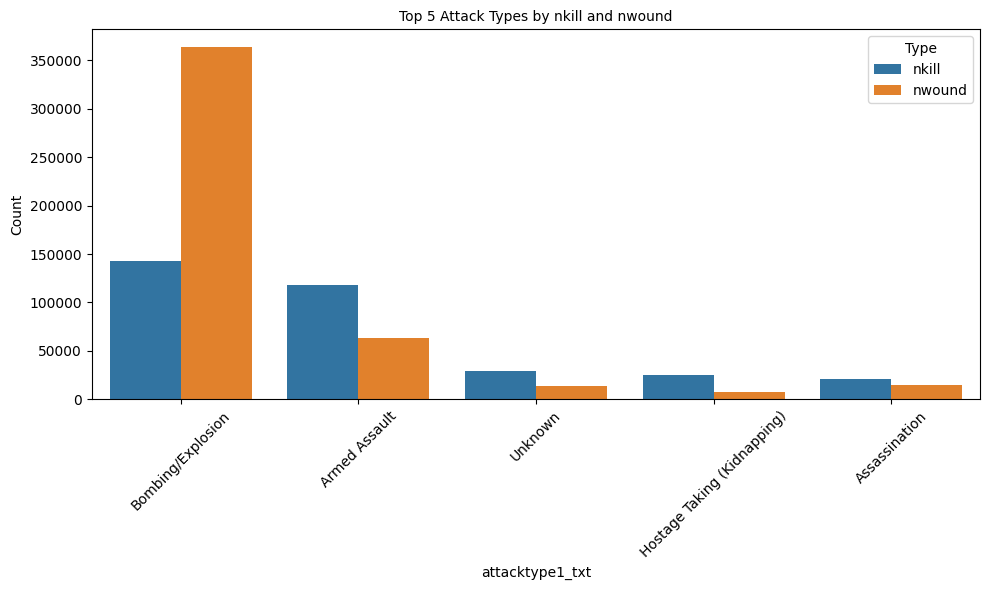

In [ ]:
# 상위 5개 그룹만 선택 (사망자 합계 기준 내림차순)
top5 = grouped2.sort_values(by='nkill', ascending=False).head(5)

plt.figure(figsize=(10, 6))

# 두 가지를 나란히 보도록 'nkill'과 'nwound'를 각각 막대그래프로 표시
top5_melted = top5.melt(id_vars='attacktype1_txt', value_vars=['nkill', 'nwound'],
                        var_name='type', value_name='count')

sns.barplot(x='attacktype1_txt', y='count', hue='type', data=top5_melted)

plt.title('Top 5 Attack Types by nkill and nwound', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

In [ ]:
# 'weaptype1_txt' 컬럼으로 그룹화하여 'nkill'과 'nwound'의 합계를 계산
grouped3 = filtered_df.groupby('weaptype1_txt')[['nkill', 'nwound']].sum().reset_index()
grouped3[['nkill', 'nwound']] = grouped3[['nkill', 'nwound']].astype(int)
grouped3

,weaptype1_txt,nkill,nwound
0,Biological,9,805
1,Chemical,606,13295
2,Explosives,158419,378482
3,Fake Weapons,0,0
4,Firearms,131553,63947
5,Incendiary,5832,5132
6,Melee,10794,5281
7,Other,137,112
8,Radiological,0,0
9,Sabotage Equipment,69,290


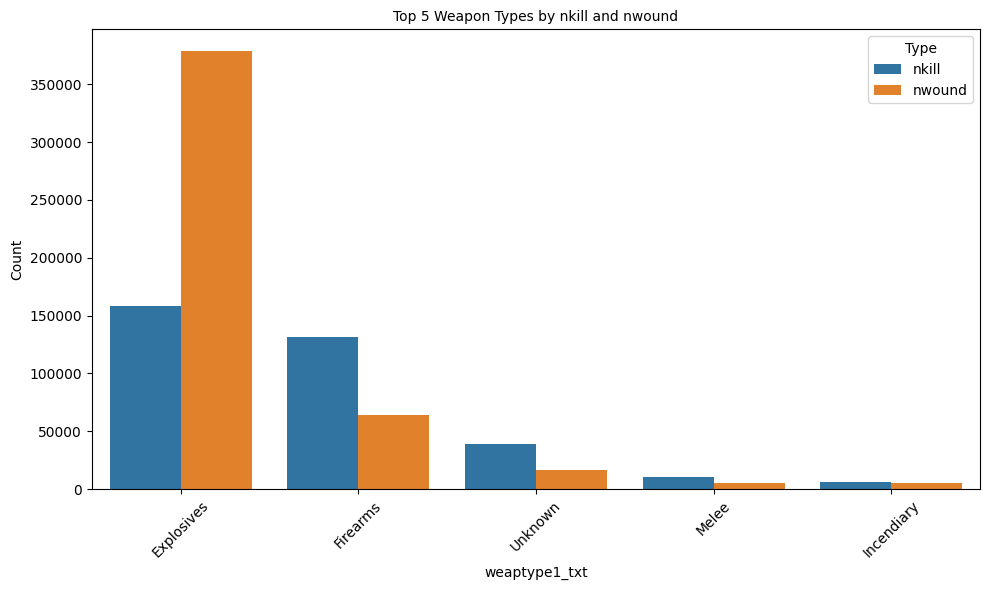

In [ ]:
# 상위 5개 그룹만 선택 (사망자 합계 기준 내림차순)
top5 = grouped3.sort_values(by='nkill', ascending=False).head(5)

plt.figure(figsize=(10, 6))

# 두 가지를 나란히 보도록 'nkill'과 'nwound'를 각각 막대그래프로 표시
top5_melted = top5.melt(id_vars='weaptype1_txt', value_vars=['nkill', 'nwound'],
                        var_name='type', value_name='count')

sns.barplot(x='weaptype1_txt', y='count', hue='type', data=top5_melted)

plt.title('Top 5 Weapon Types by nkill and nwound', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

In [ ]:
# 'weaptype1_txt' 컬럼으로 그룹화하여 'nkill'과 'nwound'의 합계를 계산
grouped4 = df.groupby('weaptype1_txt')[['nkill', 'nwound']].sum().reset_index()
grouped4[['nkill', 'nwound']] = grouped4[['nkill', 'nwound']].astype(int)
grouped4

,weaptype1_txt,nkill,nwound
0,Biological,9,805
1,Chemical,658,14323
2,Explosives,199175,423954
3,Fake Weapons,1,0
4,Firearms,204425,91236
5,Incendiary,6910,6171
6,Melee,12521,6505
7,Other,156,123
8,Radiological,0,0
9,Sabotage Equipment,84,290


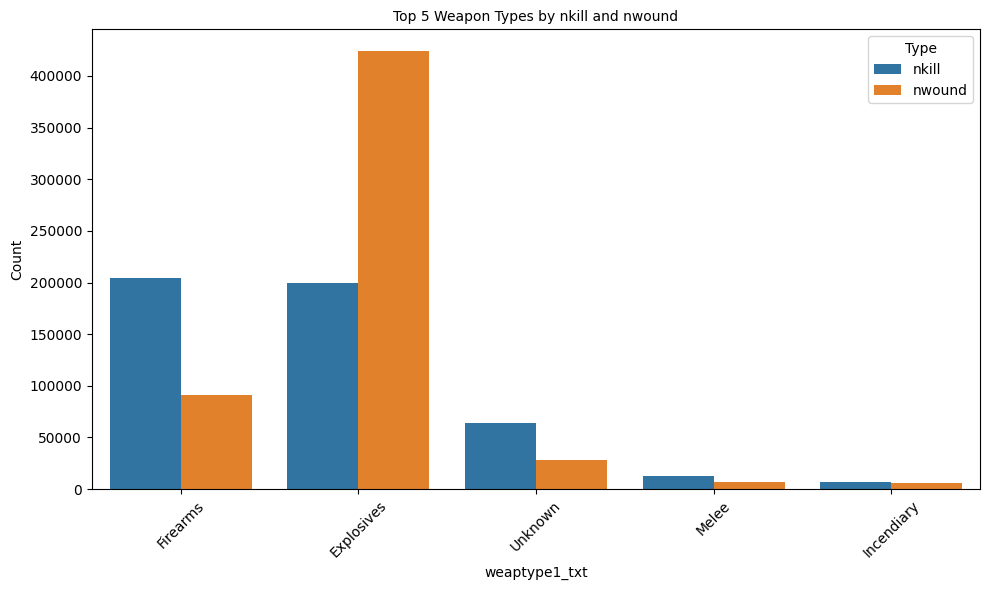

In [ ]:
# 상위 5개 그룹만 선택 (사망자 합계 기준 내림차순)
top_5 = grouped4.sort_values(by='nkill', ascending=False).head(5)

plt.figure(figsize=(10, 6))

# 두 가지를 나란히 보도록 'nkill'과 'nwound'를 각각 막대그래프로 표시
top_5_melted = top_5.melt(id_vars='weaptype1_txt', value_vars=['nkill', 'nwound'],
                        var_name='type', value_name='count')

sns.barplot(x='weaptype1_txt', y='count', hue='type', data=top_5_melted)

plt.title('Top 5 Weapon Types by nkill and nwound', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.xticks(rotation=45)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

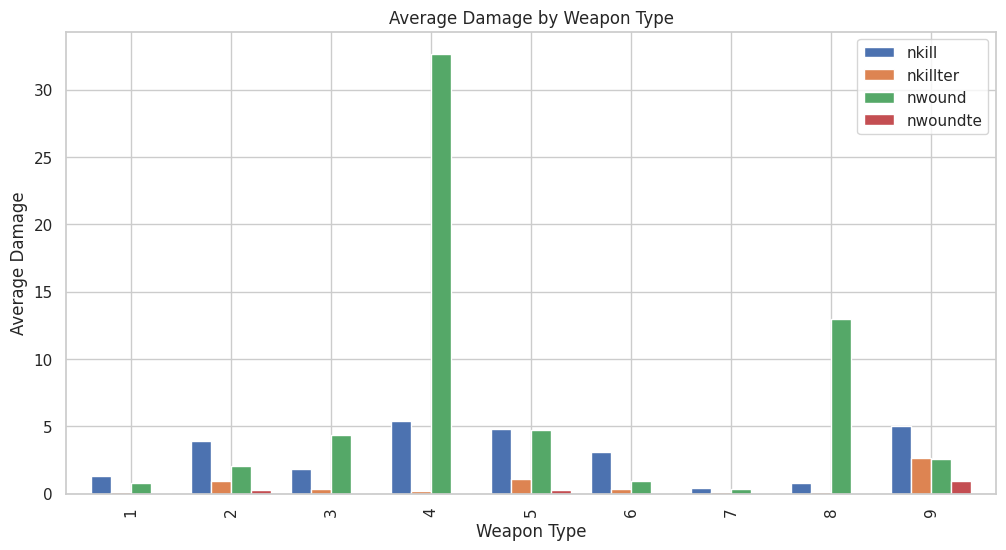

In [ ]:
# 평균을 구할 컬럼 리스트
columns_to_average = ['nkill', 'nkillter', 'nwound', 'nwoundte']

# Attack Type 별로 각 컬럼의 평균 계산
mean_values = df.groupby('attacktype1')[columns_to_average].mean().reset_index()

# 그래프 스타일 설정
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
mean_values.set_index('attacktype1').plot(kind='bar', ax=plt.gca(), width=0.8)

plt.title('Average Damage by Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Average Damage')

plt.show()

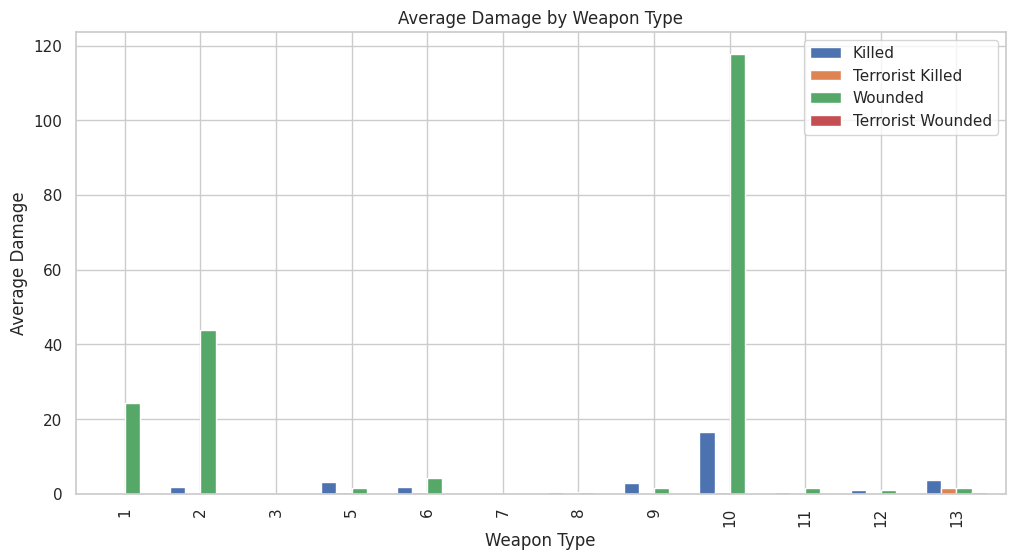

In [ ]:
# 평균을 구할 컬럼 리스트
columns_to_average = ['nkill', 'nkillter', 'nwound', 'nwoundte']

# Weapon Type 별로 각 컬럼의 평균 계산
mean_values = df.groupby('weaptype1')[columns_to_average].mean().reset_index()

# 그래프 스타일 설정
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
mean_values.set_index('weaptype1').plot(kind='bar', ax=plt.gca(), width=0.8)

new_legend_labels = ['Killed', 'Terrorist Killed', 'Wounded', 'Terrorist Wounded']
plt.legend(new_legend_labels, loc='upper right')

plt.title('Average Damage by Weapon Type')
plt.xlabel('Weapon Type')
plt.ylabel('Average Damage')

plt.show()

In [ ]:
agg_values = df.groupby('weaptype1_txt')[['nkill', 'nkillter', 'nwound', 'nwoundte']].agg(
    ['mean', 'sum', 'count']).reset_index()

agg_values

weaptype1_txt      nkill            \
                                                            mean       sum   
0                                          Biological   0.250000       9.0   
1                                            Chemical   1.941003     658.0   
2                                          Explosives   1.970371  199175.0   
3                                        Fake Weapons   0.028571       1.0   
4                                            Firearms   3.132854  204425.0   
5                                          Incendiary   0.544824    6910.0   
6                                               Melee   2.897038   12521.0   
7                                               Other   1.147059     156.0   
8                                        Radiological   0.000000       0.0   
9                                  Sabotage Equipment   0.437500      84.0   
10                                            Unknown   3.657199   63734.0   
11  Vehicle (not to include vehicle-borne explosiv...  16.512821    3220.0   

            nkillter                      nwound                   nwoundte  \
     count      mean      sum  count        mean       sum  count      mean   
0       36  0.000000      0.0     36   24.393939     805.0     33  0.000000   
1      339  0.153584     45.0    293   43.801223   14323.0    327  0.010274   
2   101085  0.413349  32011.0  77443    4.290034  423954.0  98823  0.052930   
3       35  0.052632      1.0     19    0.000000       0.0     35  0.000000   
4    65252  0.622164  27043.0  43466    1.487818   91236.0  61322  0.206292   
5    12683  0.080094    651.0   8128    0.497501    6171.0  12404  0.028148   
6     4322  0.165559    498.0   3008    1.579267    6505.0   4119  0.052367   
7      136  0.092593     10.0    108    0.924812     123.0    133  0.000000   
8       13  0.000000      0.0     12    0.000000       0.0     13  0.000000   
9      192  0.017241      3.0    174    1.526316     290.0    190  0.000000   
10   17427  1.608353  21449.0  13336    1.705559   27920.0  16370  0.526250   
11     195  0.426901     73.0    171  117.770833   22612.0    192  0.211765   

                   
       sum  count  
0      0.0     36  
1      3.0    292  
2   4045.0  76422  
3      0.0     19  
4   8715.0  42246  
5    228.0   8100  
6    156.0   2979  
7      0.0    108  
8      0.0     12  
9      0.0    172  
10  6726.0  12781  
11    36.0    170

In [ ]:
unique_values = df['targtype1_txt'].unique()
unique_values

array(['Private Citizens & Property', 'Government (Diplomatic)',
       'Journalists & Media', 'Police', 'Utilities', 'Military',
       'Government (General)', 'Airports & Aircraft', 'Business',
       'Educational Institution', 'Violent Political Party',
       'Religious Figures/Institutions', 'Unknown', 'Transportation',
       'Tourists', 'NGO', 'Telecommunication', 'Food or Water Supply',
       'Terrorists/Non-State Militia', 'Other', 'Maritime',
       'Abortion Related'], dtype=object)

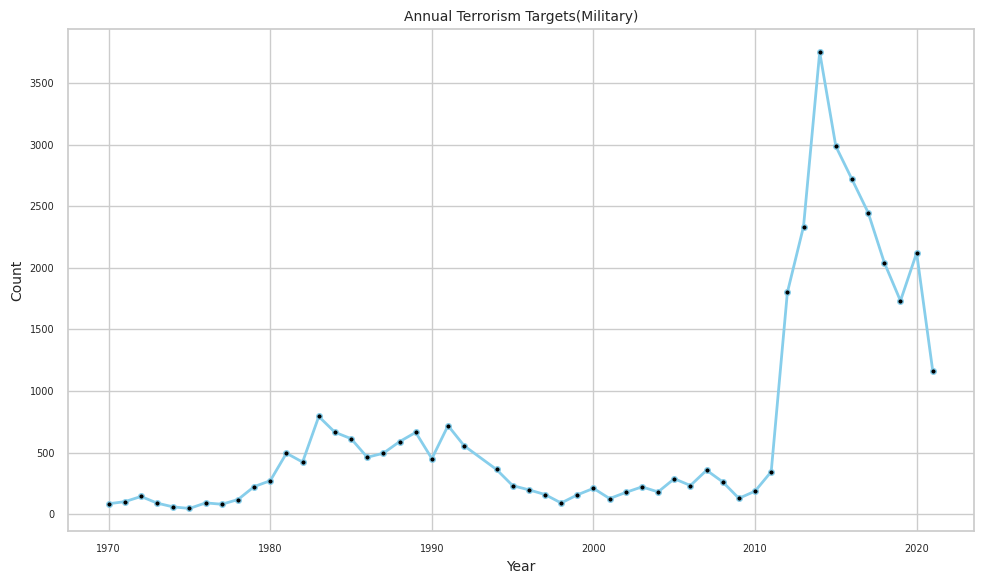

In [ ]:
military_df = df[df['targtype1_txt'] == 'Military']

military_actors = military_df.groupby('iyear').size()

# 시각화 - 선 그래프
plt.figure(figsize=(10, 6))
military_actors.plot(kind='line', marker='o', fontsize=7, color='skyblue', linewidth=2, markersize=4, markerfacecolor='black')
plt.title('Annual Terrorism Targets(Military)', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

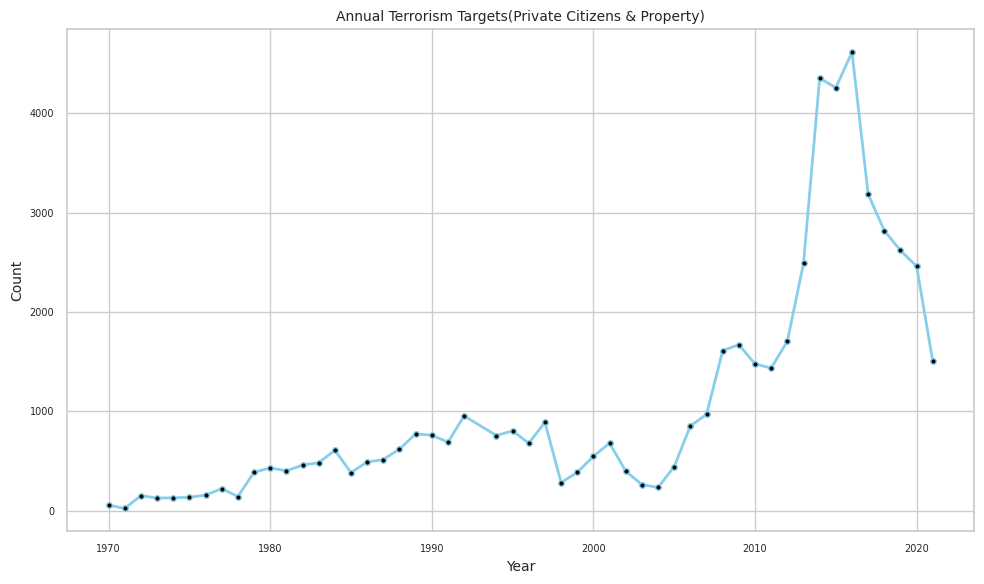

In [ ]:
citizens_df = df[df['targtype1_txt'] == 'Private Citizens & Property']

citizens_actors = citizens_df.groupby('iyear').size()

# 시각화 - 선 그래프
plt.figure(figsize=(10, 6))
citizens_actors.plot(kind='line', marker='o', fontsize=7, color='skyblue', linewidth=2, markersize=4, markerfacecolor='black')
plt.title('Annual Terrorism Targets(Private Citizens & Property)', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

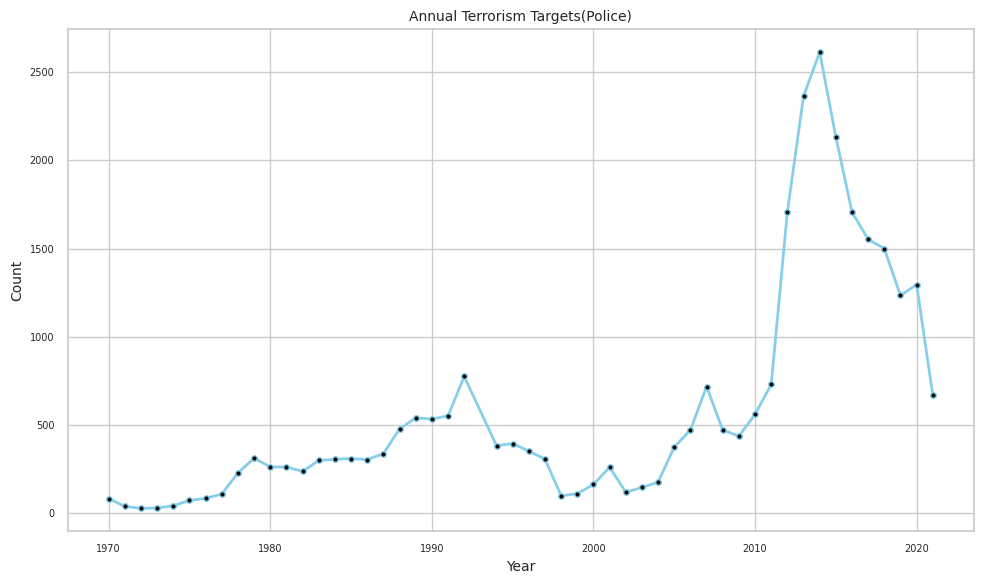

In [ ]:
police_df = df[df['targtype1_txt'] == 'Police']

police_actors = police_df.groupby('iyear').size()

# 시각화 - 선 그래프
plt.figure(figsize=(10, 6))
police_actors.plot(kind='line', marker='o', fontsize=7, color='skyblue', linewidth=2, markersize=4, markerfacecolor='black')
plt.title('Annual Terrorism Targets(Police)', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

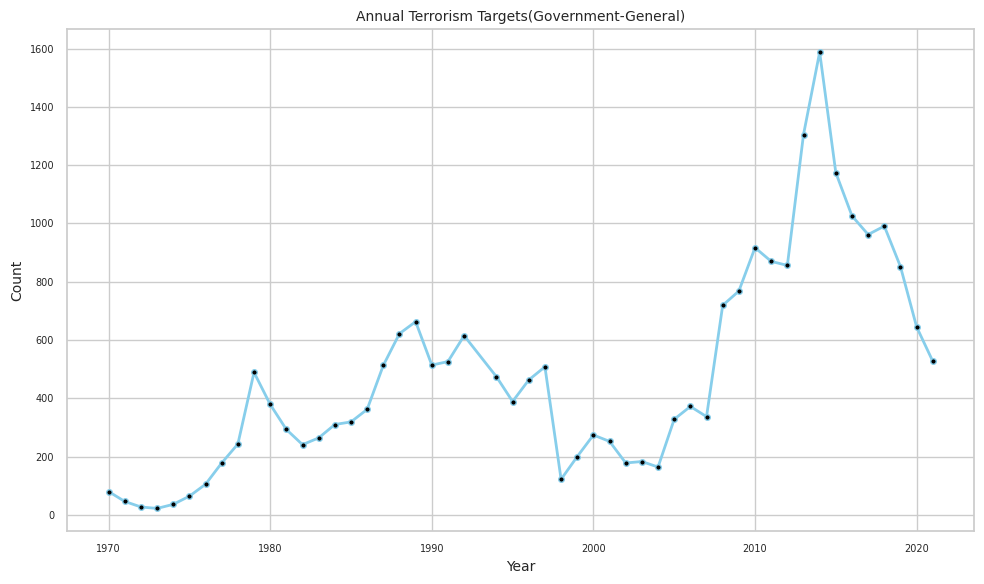

In [ ]:
government_df = df[df['targtype1_txt'] == 'Government (General)']

government_actors = government_df.groupby('iyear').size()

# 시각화 - 선 그래프
plt.figure(figsize=(10, 6))
government_actors.plot(kind='line', marker='o', fontsize=7, color='skyblue', linewidth=2, markersize=4, markerfacecolor='black')
plt.title('Annual Terrorism Targets(Government-General)', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

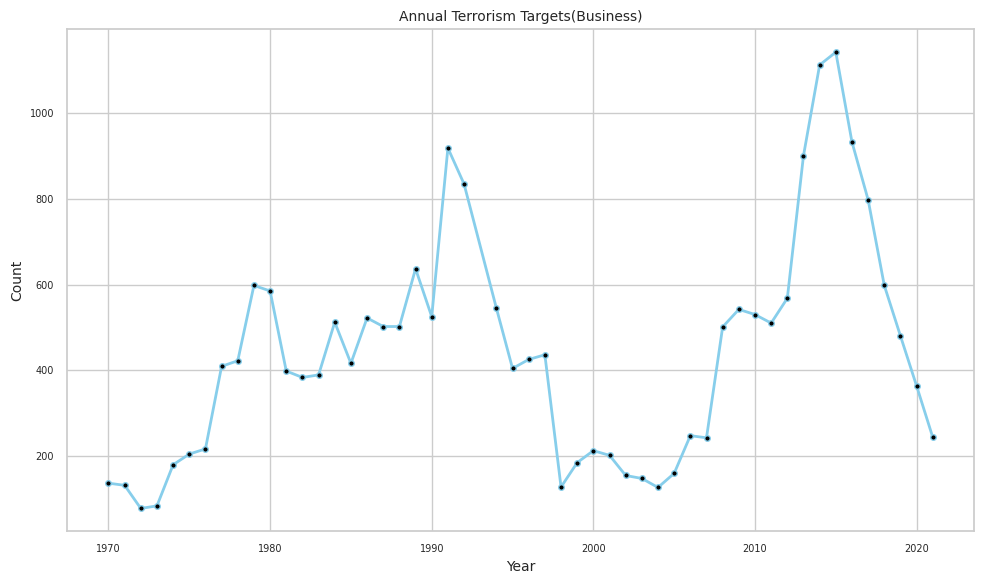

In [ ]:
business_df = df[df['targtype1_txt'] == 'Business']

business_actors = business_df.groupby('iyear').size()

# 시각화 - 선 그래프
plt.figure(figsize=(10, 6))
business_actors.plot(kind='line', marker='o', fontsize=7, color='skyblue', linewidth=2, markersize=4, markerfacecolor='black')
plt.title('Annual Terrorism Targets(Business)', fontsize=10)
plt.xlabel('Year', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.show()

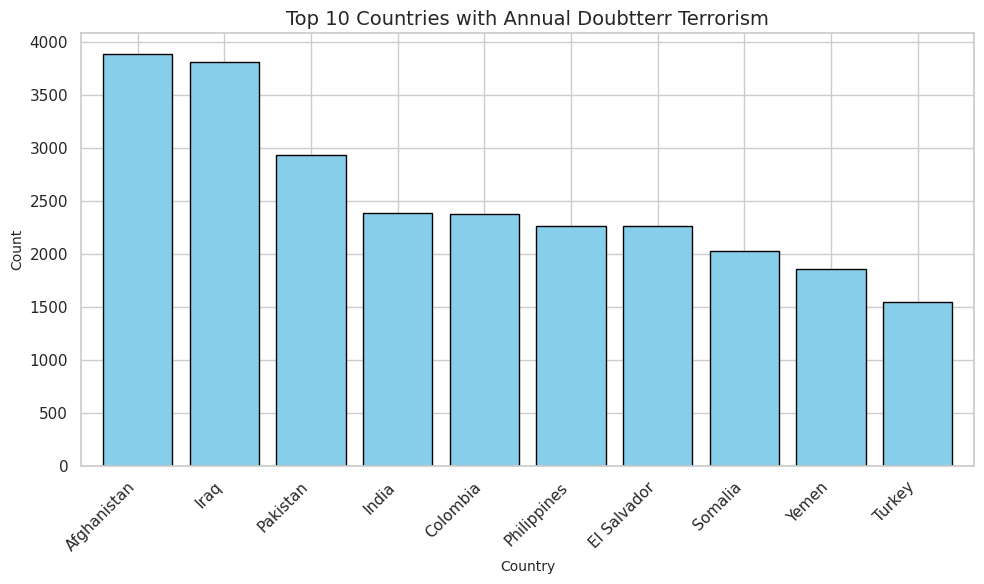

In [ ]:
# 테러인지 불확실한 건 필터링
doubtterr_df = df[(df['doubtterr'] == 1) | (df['doubtterr'] == -9)]

# 'country_txt'로 그룹화하여 카운트 계산
annual_doubtterr = doubtterr_df.groupby('country_txt').size()

# 카운트가 많은 10개의 나라만 선택
top_10_countries = annual_doubtterr.nlargest(10)

# 시각화 - 막대 그래프 (Bar Plot)
plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue', edgecolor='black', width=0.8)

# 제목과 레이블 설정
plt.title('Top 10 Countries with Annual Doubtterr Terrorism', fontsize=14)
plt.xlabel('Country', fontsize=10)
plt.ylabel('Count', fontsize=10)

# X축 레이블 회전
plt.xticks(rotation=45, ha='right')

plt.tight_layout()  # 레이아웃 자동 조정
plt.show()

In [ ]:
iraq_doubtterr = df[df['country_txt'] == 'Afghanistan']

doubtterr_counts = iraq_doubtterr['doubtterr'].value_counts()

print(doubtterr_counts)

doubtterr
 0    16490
 1     3858
-9       25
Name: count, dtype: int64


In [ ]:
filtered_df = df[(df['iyear'] >= 2012) & (df['iyear'] <= 2018)]
group_counts = filtered_df.groupby('gname').size()
group_counts_sorted = group_counts.sort_values(ascending=False)
group_counts_sorted.head(10)

,0
gname,
Unknown,41984
Taliban,7068
Islamic State of Iraq and the Levant (ISIL),6408
Al-Shabaab,3450
Boko Haram,2521
Houthi extremists (Ansar Allah),2187
New People's Army (NPA),1722
Maoists,1519
Kurdistan Workers' Party (PKK),1200


In [ ]:
filtered_df = df[(df['iyear'] >= 1979) & (df['iyear'] <= 1997)]
group_counts = filtered_df.groupby('gname').size()
group_counts_sorted = group_counts.sort_values(ascending=False)
group_counts_sorted.head(10)

,0
gname,
Unknown,21291
Shining Path (SL),4492
Farabundo Marti National Liberation Front (FMLN),3350
Irish Republican Army (IRA),1815
Basque Fatherland and Freedom (ETA),1518
Revolutionary Armed Forces of Colombia (FARC),1096
National Liberation Army of Colombia (ELN),1081
Palestinians,1044
Kurdistan Workers' Party (PKK),1025


------
# **추론통계(가설검정)**
**가설 3 : 조직의 테러는 복합공격을 많은 편(개인은 단일공격 위주)일 것이다.**

단일공격인지 복합공격인지 / 테러리스트가 개인인지 조직인지 <br>
각각 이진분류하여 범주-범주의 형태에서 검정 ⇒ 카이제곱 검정

### 전처리(1차) -> 강사님의 조언에 따라 다른 방향(2차)으로 진행하기로 함
- approxdate: (blank) 존재
    - 대략적인 날짜. 참고용 컬럼으로 사용
- resolution: (blank) 존재
    - extend가 0일 때는 year, month, day 그대로 가져와서 결합
    - **extend가 1이나 resolution이 공란이면 Unknown으로 대체 (날짜가 필요하면 19000101로) / 사건의 경과는 있지만 해결되지 않은 사건으로 처리**
- provstate/city : unknown이 많음 -> 이 경우 langitude/longitude 모두 빈칸
    - city가 나와있는 경우 city의 위도경도 / 나와있지 않으면 country의 위도경도 찾아서 채우기
- specificity: (blank) 존재
    - latitude 및 longitude 필드의 지리공간적 해상도를 식별. 참고용 컬럼으로 사용
- nperps : (blank) 존재, 이상치(-99,-9) 존재 → (-99 | blank) & (-99 | -9 | blank) ⇒ 62,812 rows / 214,667 rows
    - -99와 -9(행 2개)는 unknown으로 간주
    - -9 값을 모두 -99로 바꾸기 → df.replace(-9, -99, inplace=True)

🛠 nperps 처리 로직<br>
1. nperps가 0일 경우 nperpcap이 유효하면 → nperpcap으로 대체
<br>   nperpcap이 유효하지 않으면 → 그대로 0 유지

2. nperps가 결측(NaN) 또는 -99일 경우 nperpcap이 유효하면 → nperpcap으로 대체 <br>   nperpcap이 유효하지 않으면 → 랜덤포레스트로 예측

3. nperps가 유효한데 nperpcap이 더 큰 경우 → nperpcap 값으로 덮어쓰기


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
## 머신러닝 - 랜덤포레스트 회귀
# 1. 데이터 불러오기
df = pd.read_excel('./Full_GTD_Dataset_Full_Version.xlsx')

# 2. -9 → -99로 통일
df.replace(-9, -99, inplace=True)

# 3. 사상자 수 파생 변수 생성
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)
df['casualties'] = df['nkill'] + df['nwound']

# 4. nperps 처리
invalid_vals = [-99]
df['nperps_filled'] = df['nperps']

# 4-1. nperps == 0이고, nperpcap 유효 → 대체
mask_0 = df['nperps_filled'] == 0
mask_nperpcap_valid = ~df['nperpcap'].isin(invalid_vals) & df['nperpcap'].notna()
df.loc[mask_0 & mask_nperpcap_valid, 'nperps_filled'] = df.loc[mask_0 & mask_nperpcap_valid, 'nperpcap']

# 4-2. nperps가 NaN 또는 -99일 경우, nperpcap 유효 → 대체
mask_nan_or_invalid = df['nperps_filled'].isna() | df['nperps_filled'].isin(invalid_vals)
df.loc[mask_nan_or_invalid & mask_nperpcap_valid, 'nperps_filled'] = \
    df.loc[mask_nan_or_invalid & mask_nperpcap_valid, 'nperpcap']

# 4-3. nperps 유효한데 nperpcap이 더 큰 경우 → 덮어쓰기
mask_nperps_valid = ~df['nperps_filled'].isin(invalid_vals) & df['nperps_filled'].notna()
df.loc[mask_nperps_valid & mask_nperpcap_valid & (df['nperpcap'] > df['nperps_filled']), 'nperps_filled'] = \
    df.loc[mask_nperps_valid & mask_nperpcap_valid & (df['nperpcap'] > df['nperps_filled']), 'nperpcap']

# 4-4. nperps == 0인 행 제거
df = df[df['nperps_filled'] != 0].copy()

# 5. 랜덤포레스트로 남은 결측 예측
missing_final = df['nperps_filled'].isna() | df['nperps_filled'].isin(invalid_vals)
df_train = df[~missing_final][['country_txt', 'iyear', 'attacktype1_txt', 'casualties', 'nperps_filled']]
df_pred = df[missing_final][['country_txt', 'iyear', 'attacktype1_txt', 'casualties']]

combined = pd.concat([df_train.drop(columns='nperps_filled'), df_pred], axis=0)
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cat = encoder.fit_transform(combined[['country_txt', 'attacktype1_txt']])
encoded_df = pd.DataFrame(encoded_cat, columns=encoder.get_feature_names_out(['country_txt', 'attacktype1_txt']))
encoded_df.index = combined.index
features = pd.concat([combined[['iyear', 'casualties']], encoded_df], axis=1)

X_train = features.loc[df_train.index]
y_train = df_train['nperps_filled']
X_pred = features.loc[df_pred.index]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
df.loc[df_pred.index, 'nperps_filled'] = rf.predict(X_pred).round()

# 6. 단체/개인 구분
df['perp_group'] = df['nperps_filled'].apply(lambda x: 'Group' if x > 1 else 'Individual')

# 7. 단일/복합 공격 구분 (NaN만을 복합 여부 기준으로 체크)
df['attack_complexity'] = df.apply(
    lambda row: 'Multiple' if pd.notna(row['attacktype2']) or pd.notna(row['attacktype3']) else 'Single',
    axis=1
)

# 8. 카이제곱 검정
crosstab = pd.crosstab(df['perp_group'], df['attack_complexity'])
chi2, p, dof, expected = chi2_contingency(crosstab)

# 9. 출력
print("📊 [단체/개인 vs 단일/복합 공격] 교차표:\n", crosstab)
print("\n🧪 카이제곱 통계량:", chi2)
print("📉 p-value:", p)
print("🎯 자유도:", dof)

📊 [단체/개인 vs 단일/복합 공격] 교차표:
 attack_complexity  Multiple  Single
perp_group                         
Group                  2268   81240
Individual              215   13512

🧪 카이제곱 통계량: 62.15601316427285
📉 p-value: 3.172966760972323e-15
🎯 자유도: 1


In [ ]:
X = X_train
y = y_train

X_train_part, X_test_part, y_train_part, y_test_part = train_test_split(X, y, test_size=0.2, random_state=42)

rf_eval = RandomForestRegressor(n_estimators=100, random_state=42)
rf_eval.fit(X_train_part, y_train_part)

y_pred = rf_eval.predict(X_test_part)

mse = mean_squared_error(y_test_part, y_pred)
mae = mean_absolute_error(y_test_part, y_pred)
r2 = r2_score(y_test_part, y_pred)

print("✅ 모델 평가 결과:")
print(f"MAE (평균 절대 오차): {mae:.2f}")
print(f"MSE (평균 제곱 오차): {mse:.2f}")
print(f"R² (설명력): {r2:.4f}")

✅ 모델 평가 결과:
MAE (평균 절대 오차): 26.69
MSE (평균 제곱 오차): 125194.85
R² (설명력): 0.4593


In [ ]:
## 머신러닝 - 랜덤포레스트 분류
# 1. 데이터 불러오기
df = pd.read_excel('./Full_GTD_Dataset_Full_Version.xlsx')

# 2. -9 → -99로 통일
df.replace(-9, -99, inplace=True)

# 3. 사상자 수 계산
df['nkill'] = df['nkill'].fillna(0)
df['nwound'] = df['nwound'].fillna(0)
df['casualties'] = df['nkill'] + df['nwound']

# 4. nperps 처리
invalid_vals = [-99]
df['nperps_filled'] = df['nperps']

cap_valid = ~df['nperpcap'].isin(invalid_vals) & df['nperpcap'].notna()
df.loc[(df['nperps_filled'] == 0) & cap_valid, 'nperps_filled'] = df['nperpcap']
df.loc[(df['nperps_filled'].isna() | df['nperps_filled'].isin(invalid_vals)) & cap_valid, 'nperps_filled'] = df['nperpcap']
df.loc[cap_valid & (df['nperpcap'] > df['nperps_filled']), 'nperps_filled'] = df['nperpcap']

# 4-1. nperps == 0인 행 제거
df = df[df['nperps_filled'] != 0].copy()

# 5. 라벨: 단체(Group=1) vs 개인(Individual=0)
df['is_group'] = df['nperps_filled'].apply(lambda x: 1 if x > 1 else 0)

# 6. 사용할 피처(숫자형) 준비
df_model = df[['country', 'iyear', 'attacktype1', 'casualties', 'is_group']].dropna()
X = df_model[['country', 'iyear', 'attacktype1', 'casualties']]
y = df_model['is_group']

# 7. 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 8. 분류 모델 훈련
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 9. 예측 및 평가
y_pred = clf.predict(X_test)

print("✅ 정확도:", accuracy_score(y_test, y_pred))
print("📊 혼동 행렬:\n", confusion_matrix(y_test, y_pred))
print("📝 상세 보고서:\n", classification_report(y_test, y_pred))

✅ 정확도: 0.8388954594539003
📊 혼동 행렬:
 [[13493  1256]
 [ 1877  2821]]
📝 상세 보고서:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90     14749
           1       0.69      0.60      0.64      4698

    accuracy                           0.84     19447
   macro avg       0.78      0.76      0.77     19447
weighted avg       0.83      0.84      0.83     19447



------------------
인명피해(사상자)와 재산피해 간의 상관관계 확인

In [ ]:
# propextent가 7인 경우(이상치) 2개 존재하여 4(Unknown)로 대체
df['propextent_txt'] = df['propextent_txt'].fillna('Unknown')
df['propextent_txt'] = df['propextent_txt'].replace('7', 'Unknown')
df['propextent'] = df['propextent'].replace(7, 4)
df['propextent'] = df['propextent'].fillna(4)

Casualties와 Propextent의 상관계수: 0.0379


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

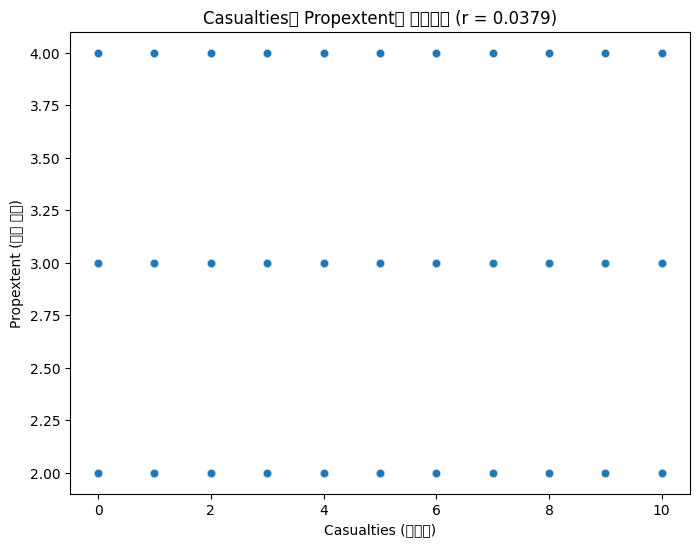

In [ ]:
# 결측치 제거
df_clean = df[['casualties', 'propextent']].dropna()

# IQR을 이용한 이상치 제거 함수
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# 이상치 제거
df_clean = remove_outliers(df_clean, 'casualties')
df_clean = remove_outliers(df_clean, 'propextent')

# 상관계수 계산
correlation = df_clean.corr().iloc[0, 1]
print(f"Casualties와 Propextent의 상관계수: {correlation:.4f}")

# 산점도 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_clean['casualties'], y=df_clean['propextent'], alpha=0.5)
plt.xlabel("Casualties (사상자)")
plt.ylabel("Propextent (재산 피해)")
plt.title(f"Casualties와 Propextent의 상관관계 (r = {correlation:.4f})")
plt.show()

Casualties와 Propextent의 상관계수: -0.0232


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54644 (\N{HANGUL SYLLABLE HAE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50752 (\N{HANGUL SYLLABLE WA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

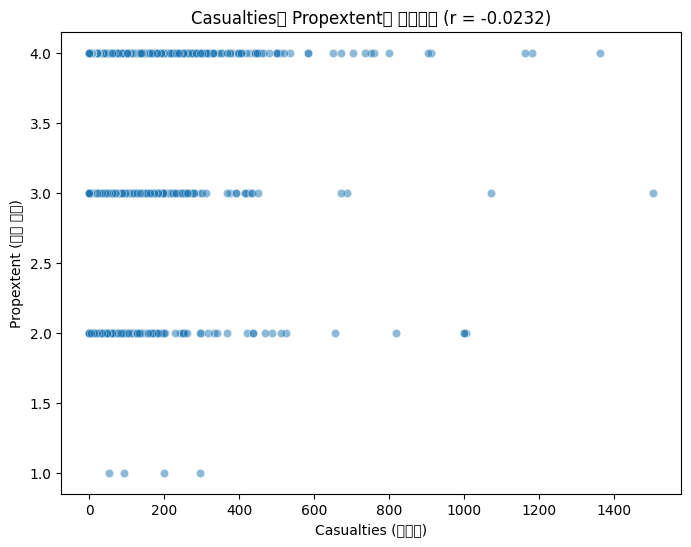

In [ ]:
# 결측치 제거
df_clean = df[['casualties', 'propextent']].dropna()

# casualties를 2000 이하로 필터링
df_clean = df_clean[df_clean['casualties'] <= 2000]

# 상관계수 계산
correlation = df_clean.corr().iloc[0, 1]
print(f"Casualties와 Propextent의 상관계수: {correlation:.4f}")

# 산점도 시각화
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_clean['casualties'], y=df_clean['propextent'], alpha=0.5)
plt.xlabel("Casualties (사상자)")
plt.ylabel("Propextent (재산 피해)")
plt.title(f"Casualties와 Propextent의 상관관계 (r = {correlation:.4f})")
plt.show()

사상자(Casualties)와 범주화된 재산피해(Propextent) 간의 상관관계를 구하여 강한 상관관계가 있을 경우, 재산피해 데이터를 대신 사용하려 하였으나 실패

### 전처리(2차) - nperps 결측치&이상치 전부 삭제 / 그 외는 1차와 동일
- 추론통계 과정에서는 전부 삭제하나, 이후 머신러닝/딥러닝 과정에서는 살리는 방향으로 고민해볼 것

In [ ]:
# 전처리
def replace_nperps(row):
    if row['nperps'] in [0, -9, -99] or pd.isna(row['nperps']):
        if not pd.isna(row['nperpcap']) and row['nperpcap'] >= 1:
            return row['nperpcap']
        else:
            return np.nan
    else:
        return row['nperps']

df['nperps_clean'] = df.apply(replace_nperps, axis=1)
df = df.dropna(subset=['nperps_clean'])

df.loc[:, '조직유형'] = df['nperps_clean'].apply(lambda x: 0 if x == 1 else 1)

# 조직유형: 개인(0), 조직(1)
df['조직유형'] = df['nperps_clean'].apply(lambda x: 0 if x == 1 else 1)

# 공격유형: 단일(0), 복합(1)
df['공격유형'] = df.apply(
    lambda row: 1 if not pd.isna(row['attacktype2']) or not pd.isna(row['attacktype3']) else 0,
    axis=1
)

# ✅ 관측값 교차표 생성
table = pd.crosstab(df['조직유형'], df['공격유형'])
table.index = ['Individual', 'Organization']
table.columns = ['Single Attack', 'Multiple Attack']

# ✅ 카이제곱 검정
chi2, p, dof, expected = stats.chi2_contingency(table)
expected_df = pd.DataFrame(expected, index=table.index, columns=table.columns)

# ✅ 효과크기 확인: Cramér’s V
n_total = table.values.sum()
k = min(table.shape)
cramers_v = np.sqrt(chi2 / (n_total * (k - 1)))

# ✅ 결과 출력
print("[관측값]")
print(table)

print("\n[기대도수]")
print(expected_df.round(2))

print("\n[독립성 검정 결과]")
print(f"▶ 카이제곱 통계량: {chi2:.3f}")
print(f"▶ P-value: {p:.5e}")
print(f"▶ 자유도: {dof}")

print("\n[효과크기]")
print(f"▶ Cramér's V: {cramers_v:.3f}")

[관측값]
              Single Attack  Multiple Attack
Individual            10459              178
Organization          21822             1964

[기대도수]
              Single Attack  Multiple Attack
Individual           9975.1            661.9
Organization        22305.9           1480.1

[독립성 검정 결과]
▶ 카이제곱 통계량: 544.811
▶ P-value: 1.69386e-120
▶ 자유도: 1

[효과크기]
▶ Cramér's V: 0.126


- 개인(0), 조직(1) / 단일공격(0), 복합공격(1) 으로 범주화하여 검정 진행
- 카이제곱 검정 결과, p-value가 0.05보다 작아 통계적으로 유의미한 차이가 확인되었다.
    - 즉, 조직이 개인에 비해 복합공격을 사용할 가능성이 더 높다고 할 수 있다.
- 다만, Cramér’s V 값은 0.131로 약한 수준의 관계임을 보인다.
- Multiple Attack의 비중이 많이 적은 편 (전체 공격 중 약 6.1%)

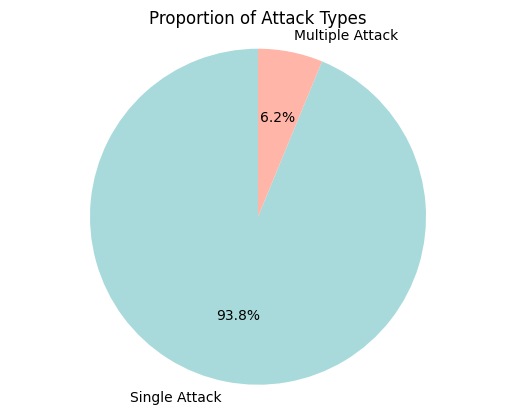

In [ ]:
# 공격유형 값 세기 (0: 단일, 1: 복합)
attack_counts = df['공격유형'].value_counts().sort_index()
attack_labels = ['Single Attack', 'Multiple Attack']
attack_colors = ['#A8DADC', '#FFB5A7']

#  시각화 - 파이 차트
plt.pie(attack_counts, labels=attack_labels, autopct='%1.1f%%', startangle=90, colors=attack_colors)
plt.title('Proportion of Attack Types')
plt.axis('equal')
plt.show()

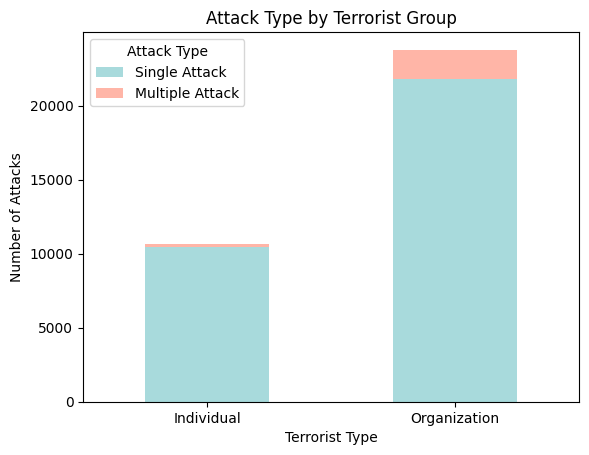

In [ ]:
# 교차표 생성 (Single=0, Multiple=1)
table = pd.crosstab(df['조직유형'], df['공격유형'])
table.index = ['Individual', 'Organization']
table.columns = ['Single Attack', 'Multiple Attack']

pastel_colors = ['#A8DADC', '#FFB5A7']

# 시각화
table.plot(kind='bar', stacked=True, color=pastel_colors)
plt.title('Attack Type by Terrorist Group')
plt.xlabel('Terrorist Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=0)
plt.legend(title='Attack Type')
plt.show()

# **추론통계(가설검정)**
**가설 5 : 경제 지표(평균 GDP)와 테러 횟수와의 상관관계가 유의미한가?**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress
from statsmodels.api import OLS, add_constant
import statsmodels.api as sm

In [ ]:
# 데이터 불러오기 및 병합
econ_df = pd.read_excel("/content/경제지표.xlsx")
gtd_df = pd.read_excel('./Full_GTD_Dataset_Full_Version.xlsx')

terror_counts = gtd_df.groupby(["iyear", "country_txt"]).size().reset_index(name="terror_count")

merged_df = pd.merge(econ_df, terror_counts, on=["iyear", "country_txt"], how="left")
merged_df["terror_count"] = merged_df["terror_count"].fillna(0)

In [ ]:
# 테러 횟수 그룹별 평균 GDP
grouped_gdp = merged_df.groupby("terror_count")["GDP"].mean().reset_index(name="avg_GDP")
correlation = grouped_gdp["terror_count"].corr(grouped_gdp["avg_GDP"])
print("[1] 테러 횟수 그룹별 평균 GDP 상관계수:", correlation)

[1] 테러 횟수 그룹별 평균 GDP 상관계수: -0.11207915620468424


In [ ]:
# 국가별 GDP-테러 상관관계
country_corrs = (
    merged_df.groupby("country_txt")
    .apply(lambda d: d["GDP"].corr(d["terror_count"]))
    .reset_index(name="GDP_Terror_Correlation"))
print("[2] 상위 10개국 (양의 상관관계):")
print(country_corrs.sort_values("GDP_Terror_Correlation", ascending=False).head(10))

[2] 상위 10개국 (양의 상관관계):
             country_txt  GDP_Terror_Correlation
6                Austria                1.000000
101             Portugal                1.000000
48                 Ghana                1.000000
107               Serbia                1.000000
3                 Angola                1.000000
52                Guyana                1.000000
53                 Haiti                0.993926
131        United States                0.946432
125  Trinidad and Tobago                0.879536
10               Belarus                0.871915


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
<ipython-input-35-11fbc024b5d8>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns wil

In [ ]:
print("[3] 하위 10개국 (음의 상관관계):")
print(country_corrs.sort_values("GDP_Terror_Correlation").head(10))

[3] 하위 10개국 (음의 상관관계):
     country_txt  GDP_Terror_Correlation
29       Comoros               -1.000000
65         Japan               -1.000000
90   New Zealand               -1.000000
35       Denmark               -1.000000
54      Honduras               -0.996732
60       Ireland               -0.960050
118       Sweden               -0.948273
128       Uganda               -0.934324
2        Algeria               -0.913705
115    Sri Lanka               -0.867442


In [ ]:
# 연도별 GDP-테러 상관관계
year_corrs = (
    merged_df.groupby("iyear")
    .apply(lambda d: d["GDP"].corr(d["terror_count"]))
    .reset_index(name="GDP_Terror_Correlation"))
print("[4] 연도별 GDP-테러 상관관계:")
print(year_corrs)

[4] 연도별 GDP-테러 상관관계:
    iyear  GDP_Terror_Correlation
0    2006               -0.288831
1    2007               -0.181767
2    2008               -0.121515
3    2009               -0.057206
4    2010               -0.109181
5    2011               -0.193009
6    2012               -0.210703
7    2013               -0.118202
8    2014               -0.137441
9    2015               -0.132827
10   2016               -0.082615
11   2017               -0.025422
12   2018               -0.134051
13   2019               -0.153170
14   2020               -0.169703


<ipython-input-34-6530faf3b566>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda d: d["GDP"].corr(d["terror_count"]))


In [ ]:
# 전체 회귀분석 (GDP → 테러 횟수)
regression_df = merged_df[["GDP", "terror_count"]].dropna()
X = regression_df["GDP"]
y = regression_df["terror_count"]
slope, intercept, r_value, p_value, std_err = linregress(X, y)

print("[5] 전체 회귀분석 결과:")
print("회귀식: 테러 횟수 = {:.2e} * GDP + {:.2f}".format(slope, intercept))
print("상관계수 r =", r_value)
print("결정계수 r^2 =", r_value ** 2)
print("p-value =", p_value)
print("표준 오차 =", std_err)

[5] 전체 회귀분석 결과:
회귀식: 테러 횟수 = -7.21e-11 * GDP + 895.64
상관계수 r = -0.10971431756495792
결정계수 r^2 = 0.012037231478744434
p-value = 3.2180799703355816e-40
표준 오차 = 5.415297095557993e-12


/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2914: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2773: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


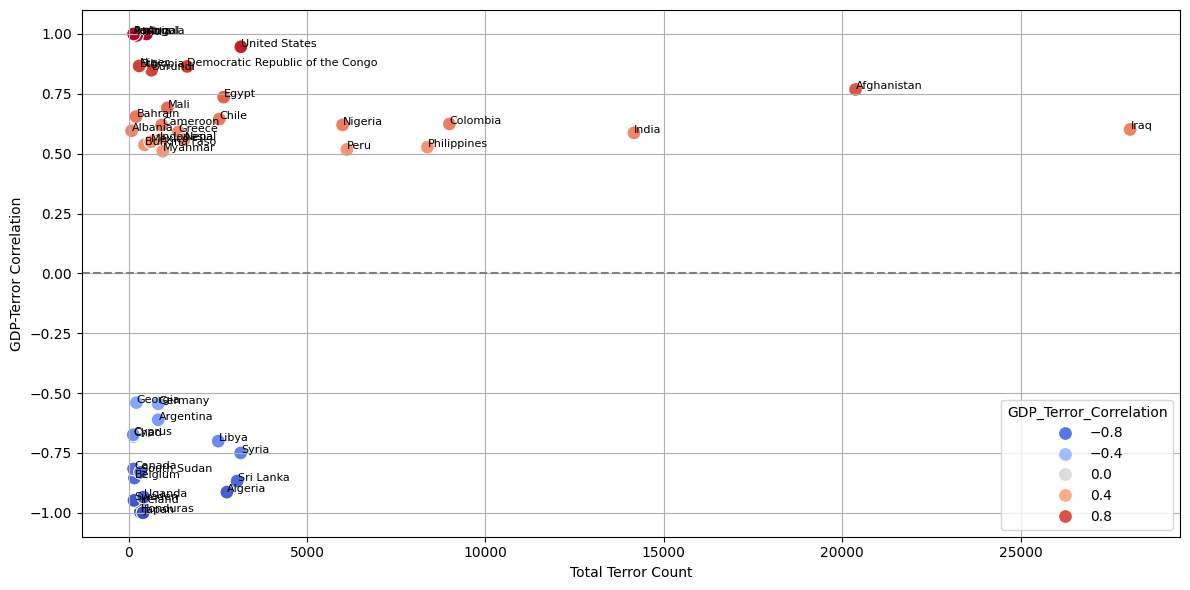

In [ ]:
# 1. 테러 집계 (국가-연도별)
terror_counts = gtd_df.groupby(["iyear", "country_txt"]).size().reset_index(name="terror_count")

# 2. 병합: 경제지표 + 테러 데이터
merged_df = pd.merge(econ_df, terror_counts, on=["iyear", "country_txt"], how="left")
merged_df["terror_count"] = merged_df["terror_count"].fillna(0)

# 3. 국가별 연도 수 계산
year_counts = gtd_df.groupby("country_txt")["iyear"].nunique().reset_index(name="year_count")

# 4. 국가별 총 테러 횟수 계산 (정상 방식)
total_terror = terror_counts.groupby("country_txt")["terror_count"].sum().reset_index(name="total_terror_count")

# 5. GDP-테러 상관관계 계산
gdp_corrs = merged_df.groupby("country_txt")[["GDP", "terror_count"]].apply(
    lambda df: df["GDP"].corr(df["terror_count"])
).reset_index(name="GDP_Terror_Correlation")

# 6. 모든 통계 병합
country_stats = pd.merge(gdp_corrs, year_counts, on="country_txt", how="left")
country_stats = pd.merge(country_stats, total_terror, on="country_txt", how="left")

# 7. 필터링: 총 테러 수 50 이상 + 상관계수 abs ≥ 0.5
filtered = country_stats[
    (country_stats["total_terror_count"] >= 50) &
    (country_stats["GDP_Terror_Correlation"].abs() >= 0.5)
]

# 8. 시각화
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=filtered,
    x="total_terror_count",
    y="GDP_Terror_Correlation",
    hue="GDP_Terror_Correlation",
    palette="coolwarm",
    s=100
)

# 국가명 라벨 추가
for _, row in filtered.iterrows():
    plt.text(
        row["total_terror_count"] + 10,
        row["GDP_Terror_Correlation"],
        row["country_txt"],
        fontsize=8
    )

# 꾸미기
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Total Terror Count")
plt.ylabel("GDP-Terror Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

                            OLS Regression Results                            
Dep. Variable:           terror_count   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     1106.
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        05:47:50   Log-Likelihood:            -1.1855e+05
No. Observations:               14636   AIC:                         2.371e+05
Df Residuals:                   14633   BIC:                         2.371e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

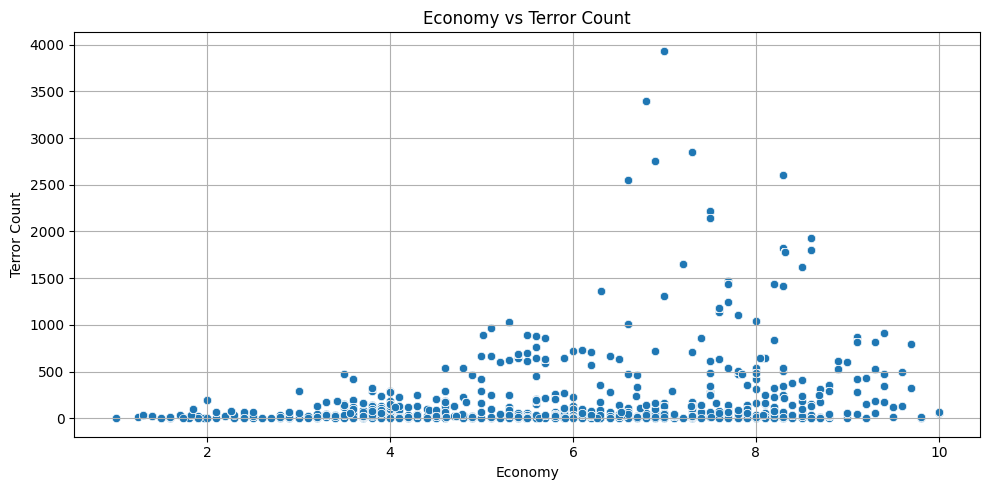

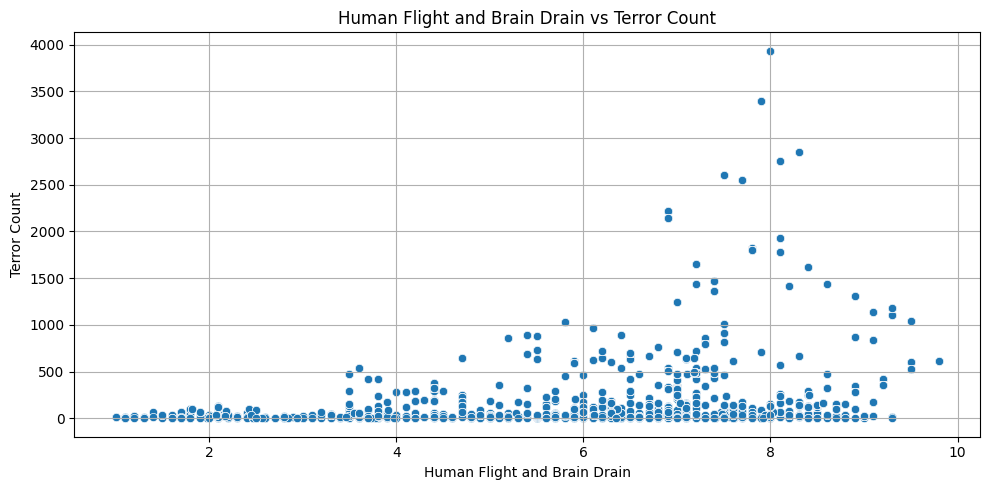

In [ ]:
# ⚠️ 데이터 불러오는 코드는 제외됨. 아래는 파일 불러온 뒤 실행되는 전처리 및 분석 코드입니다.

# 1. GTD 데이터에서 연도별-국가별 테러 횟수 집계
terror_counts = gtd_df.groupby(["iyear", "country_txt"]).size().reset_index(name="terror_count")

# 2. 경제지표와 병합 (전체 연도 사용)
merged_df = pd.merge(econ_df, terror_counts, on=["iyear", "country_txt"], how="left")
merged_df["terror_count"] = merged_df["terror_count"].fillna(0)

# 3. 회귀분석: Economy & Human Flight and Brain Drain → terror_count
# 필요한 변수 선택 및 결측 제거
df_reg = merged_df[["Economy", "Human Flight and Brain Drain", "terror_count"]].dropna()
X = df_reg[["Economy", "Human Flight and Brain Drain"]]
X = add_constant(X)
y = df_reg["terror_count"]

# 회귀 분석 실행
model = OLS(y, X).fit()
print(model.summary())

# 4. 산점도 시각화 (개별 변수)
plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_df, x="Economy", y="terror_count")
plt.title("Economy vs Terror Count")
plt.xlabel("Economy")
plt.ylabel("Terror Count")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(data=merged_df, x="Human Flight and Brain Drain", y="terror_count")
plt.title("Human Flight and Brain Drain vs Terror Count")
plt.xlabel("Human Flight and Brain Drain")
plt.ylabel("Terror Count")
plt.grid(True)
plt.tight_layout()
plt.show()

GDP와 정부 타겟 테러 건수의 상관계수: -0.115905967478415


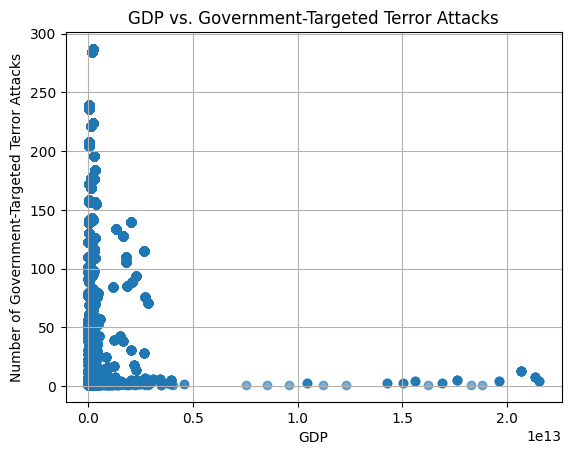

In [ ]:
# 파일 불러오기
gtd = pd.read_excel('./Full_GTD_Dataset_Full_Version.xlsx')
gdp = pd.read_excel("/content/경제지표.xlsx")

# 데이터 전처리
# 1. 정부가 타겟인 테러만 필터링 (targettype1 == 2: Government)
gtd_gov = gtd[gtd['targtype1'] == 2]

# 2. 정부 타겟 테러 건수를 국가별/연도별로 집계
gov_counts = gtd_gov.groupby(['country_txt', 'iyear']).size().reset_index(name='gov_terror_attacks')

# 3. GDP 데이터 병합 (국가명과 연도 기준으로)
# 참고: gdp에는 'Country', 'Year', 'GDP' 컬럼이 있어야 함
merged = pd.merge(gov_counts, gdp, how='left',
                  left_on=['country_txt', 'iyear'],
                  right_on=['country_txt', 'iyear'])

# 4. 결측치 제거
merged = merged.dropna(subset=['GDP', 'gov_terror_attacks'])

# 5. 상관관계 분석
correlation = merged['GDP'].corr(merged['gov_terror_attacks'])
print("GDP와 정부 타겟 테러 건수의 상관계수:", correlation)

# (선택) 시각화
import matplotlib.pyplot as plt

plt.scatter(merged['GDP'], merged['gov_terror_attacks'], alpha=0.6)
plt.xlabel('GDP')
plt.ylabel('Number of Government-Targeted Terror Attacks')
plt.title('GDP vs. Government-Targeted Terror Attacks')
plt.grid(True)
plt.show()

In [ ]:
import statsmodels.api as sm

# 1. 독립변수(X), 종속변수(y) 설정
X = merged['GDP']
y = merged['gov_terror_attacks']

# 2. 상수항 추가
X_reg = sm.add_constant(X)

# 3. 회귀모델 적합
model = sm.OLS(y, X_reg).fit()

# 4. 피어슨 상관계수
r_value, corr_p_value = pearsonr(X, y)

# 5. 회귀계수, 결정계수 등 추출
slope = model.params["GDP"]
intercept = model.params["const"]
r_squared = model.rsquared
reg_p_value = model.pvalues["GDP"]
std_err = model.bse["GDP"]

# 6. 출력
print("[전체 회귀분석 결과]")
print("회귀식: 정부 테러 횟수 = {:.2e} * GDP + {:.2f}".format(slope, intercept))
print("상관계수 r =", r_value)
print("결정계수 r^2 =", r_squared)
print("p-value (회귀 계수) =", reg_p_value)
print("표준 오차 =", std_err)

[전체 회귀분석 결과]
회귀식: 정부 테러 횟수 = -6.92e-12 * GDP + 102.79
상관계수 r = -0.11590596747841497
결정계수 r^2 = 0.013434193297107155
p-value (회귀 계수) = 2.2333744695949959e-44
표준 오차 = 4.938047615953729e-13


-----------------------------------------------------
# **머신러닝**
**가설 2 : 내전이 발생하는 지역에서의 테러는 주로 무장 공격과 폭발/폭격 유형이 주를 이룰 것이다.**

1. 결측치 처리는 어떻게?? (4/9기준) month와 day를 처음부터 제외하고 모델을 돌려보고 결과의 변화가 없음을 확인 <br>
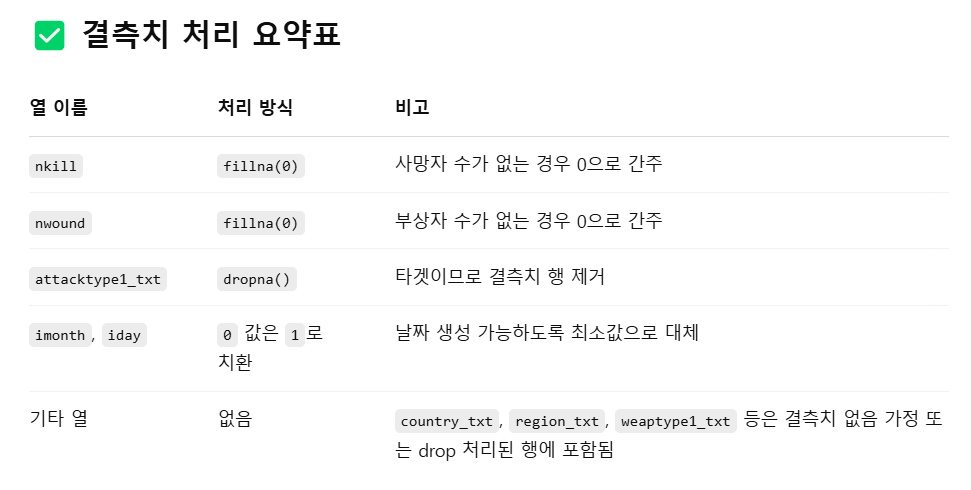
2. attack type 대부분이 Bombing/Explosion이나 Armed Assault에 쏠려 있음 → smote 적용
3. 불균형 데이터 조정 후 Grid Search

## XGBoost

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
# 내전 국가 리스트 정의 및 필터링
civil_war_countries = ["Syria", "Iraq", "Afghanistan", "Yemen", "Libya", "Somalia"]
df_civil = df[df['country_txt'].isin(civil_war_countries)].copy()

In [ ]:
df['attacktype1_txt'].isna().sum()

0

In [ ]:
# 1. 사용할 열 정의
columns_to_use = [
    'iyear', 'country_txt', 'region_txt',
    'attacktype1_txt', 'weaptype1_txt', 'nkill', 'nwound'
]

# 2. 데이터 필터링 및 복사
df_model = df_civil[columns_to_use].dropna(subset=['attacktype1_txt']).copy()

# 3. 결측치 처리
df_model['nkill'] = df_model['nkill'].fillna(0)
df_model['nwound'] = df_model['nwound'].fillna(0)
df_model['casualties'] = df_model['nkill'] + df_model['nwound']

# 4. 날짜 처리 (0월 또는 0일 → 1일로 대체)
#df_model['imonth'] = df_model['imonth'].replace(0, 1)
#df_model['iday'] = df_model['iday'].replace(0, 1)
#df_model['date'] = pd.to_datetime(dict(year=df_model['iyear'], month=df_model['imonth'], day=df_model['iday']))

# 5. 범주형 변수 인코딩
categorical_cols = ['country_txt', 'region_txt', 'weaptype1_txt']
for col in categorical_cols:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

# 6. 타겟 라벨 인코딩
label_encoder = LabelEncoder()
df_model['attacktype_encoded'] = label_encoder.fit_transform(df_model['attacktype1_txt'])

# 7. 피처 및 타겟 정의
X = df_model[['country_txt', 'region_txt', 'weaptype1_txt', 'casualties']]
y = df_model['attacktype_encoded']

# 8. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 9. XGBoost 모델 학습
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# 10. 예측 및 평가
y_pred_xgb = xgb_model.predict(X_test)
evaluate_model("XGBoost", y_test, y_pred_xgb)

print("🎯 Classification Report:")
print(classification_report(y_test, y_pred_xgb, target_names=label_encoder.classes_))

📊 [XGBoost] Accuracy: 0.8390
🔁 F1 Macro: 0.4974
🔁 F1 Weighted: 0.8062
🧩 Confusion Matrix:
[[1932   11  171    8    0    0  158    1    2]
 [ 463   13  380    2    0    0   54    0   46]
 [  13    2 7388    0    0    2    3    1    1]
 [  15    0    0  118    0    0   55    0   26]
 [   9    0    0    0    0    0   12    1    5]
 [   5    0   13    0    0    0    9    0    2]
 [ 223    4   22   16    0    3  462    3  213]
 [   1    0    0    1    0    0    5   17    0]
 [   0    0    0    0    0    0  159    0 1121]]
🎯 Classification Report:
                                     precision    recall  f1-score   support

                      Armed Assault       0.73      0.85      0.78      2283
                      Assassination       0.43      0.01      0.03       958
                  Bombing/Explosion       0.93      1.00      0.96      7410
     Facility/Infrastructure Attack       0.81      0.55      0.66       214
                          Hijacking       0.00      0.00      0.00

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


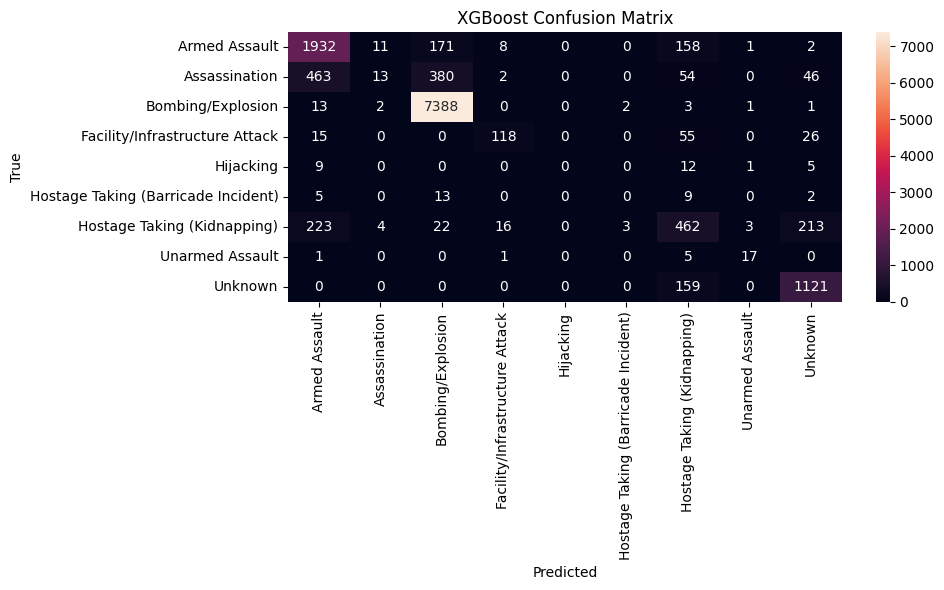

In [ ]:
# 11. 혼동 행렬 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_xgb),
    annot=True,
    fmt='d',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

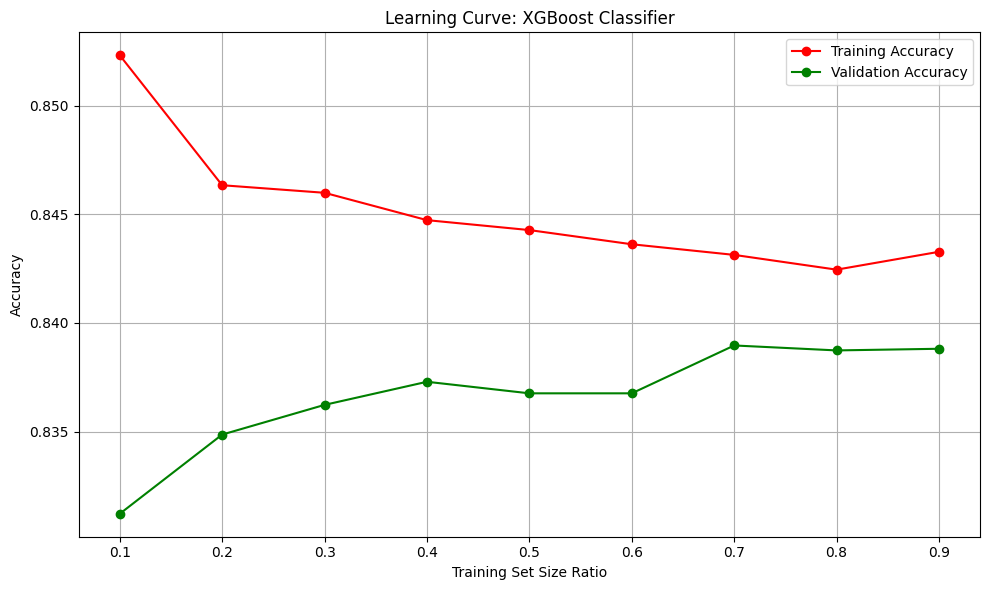

In [ ]:
# 1. 학습 사이즈 비율 설정 (10% ~ 90%)
train_sizes = np.linspace(0.1, 0.9, 9)
train_scores = []
test_scores = []

# 2. 학습 곡선용 반복
for size in train_sizes:
    # 학습 세트 크기 조절
    X_subset, _, y_subset, _ = train_test_split(
        X_train, y_train, train_size=size, stratify=y_train, random_state=42
    )

    # 동일한 XGBClassifier로 학습
    model = XGBClassifier(eval_metric='mlogloss', random_state=42)
    model.fit(X_subset, y_subset)

    # 예측 및 정확도 기록
    y_train_pred = model.predict(X_subset)
    y_test_pred = model.predict(X_test)

    train_scores.append(accuracy_score(y_subset, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))

# 3. 시각화
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores, 'o-', color='r', label='Training Accuracy')
plt.plot(train_sizes, test_scores, 'o-', color='g', label='Validation Accuracy')
plt.xlabel("Training Set Size Ratio")
plt.ylabel("Accuracy")
plt.title("Learning Curve: XGBoost Classifier")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

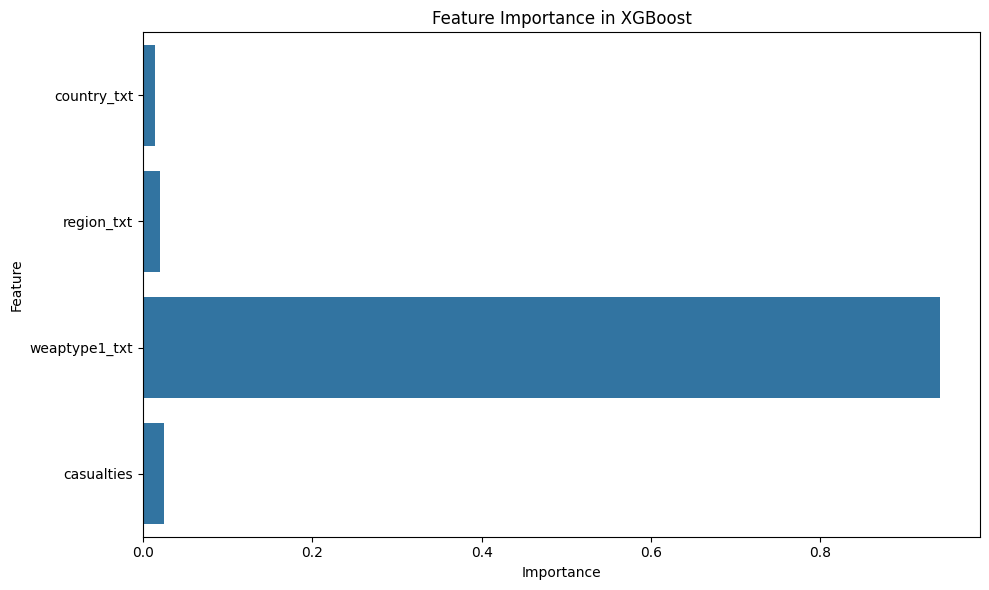

In [ ]:
# 1. 특성 중요도 추출
feature_importance = xgb_model.feature_importances_
feature_names = X.columns  # ['country_txt', 'region_txt', 'weaptype1_txt', 'casualties']

# 2. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title("Feature Importance in XGBoost")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [ ]:
import shap

# 1. TreeExplainer 생성 (XGBoost 전용)
explainer = shap.Explainer(xgb_model, X_train)

# 2. SHAP 값 계산
shap_values = explainer(X_test)

In [ ]:
# 클래스 인덱스 확인
print(label_encoder.classes_)

['Armed Assault' 'Assassination' 'Bombing/Explosion'
 'Facility/Infrastructure Attack' 'Hijacking'
 'Hostage Taking (Barricade Incident)' 'Hostage Taking (Kidnapping)'
 'Unarmed Assault' 'Unknown']


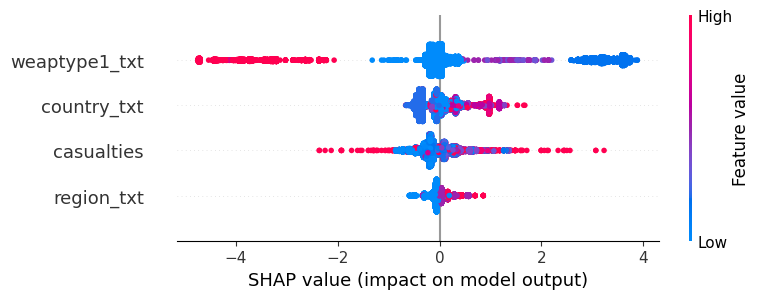

In [ ]:
# 3. 다차원 SHAP 값을 단일 클래스로 압축 (Armed Assault)
shap.summary_plot(shap_values.values[:, :, 0], X_test)

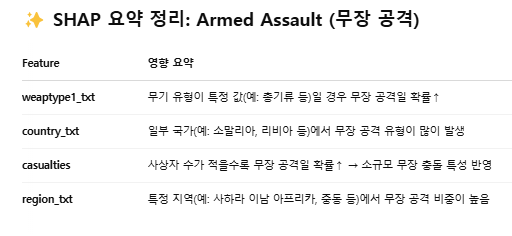

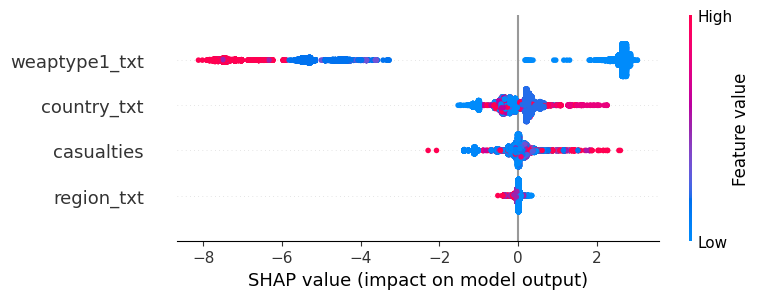

In [ ]:
#  다차원 SHAP 값을 단일 클래스로 압축 (Bombing/Explosion)
shap.summary_plot(shap_values.values[:, :, 2], X_test)

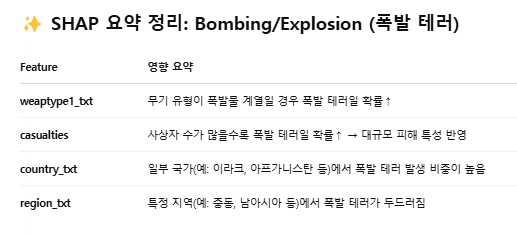

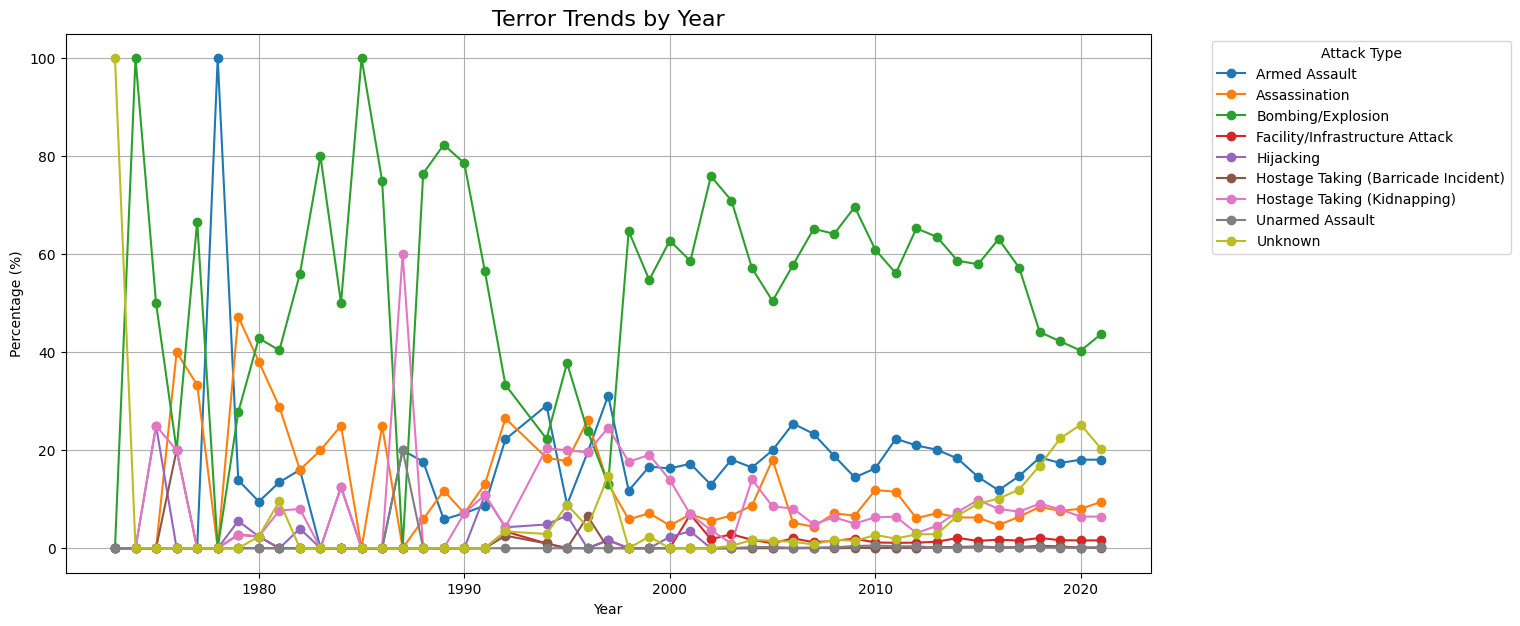

In [ ]:
# 연도별 attacktype1_txt 비율 계산
attack_by_year = df_model.groupby(['iyear', 'attacktype1_txt']).size().reset_index(name='count')

# 연도별 전체 사건 수로 비율 계산
total_by_year = df_model.groupby('iyear').size().reset_index(name='total')
attack_by_year = attack_by_year.merge(total_by_year, on='iyear')
attack_by_year['percentage'] = (attack_by_year['count'] / attack_by_year['total']) * 100

# 피벗 테이블로 변환
pivot_df = attack_by_year.pivot(index='iyear', columns='attacktype1_txt', values='percentage').fillna(0)

# 시각화
pivot_df.plot(kind='line', marker='o', figsize=(14, 7))
plt.title('Terror Trends by Year', fontsize=16)
plt.ylabel('Percentage (%)')
plt.xlabel('Year')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## CatBoost

In [ ]:
!pip uninstall numpy catboost -y
!pip install numpy==1.24.4
!pip install catboost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# 1. 내전 국가 필터링
civil_war_countries = ["Syria", "Iraq", "Afghanistan", "Yemen", "Libya", "Somalia"]
df_civil = df[df['country_txt'].isin(civil_war_countries)].copy()

# 2. 사용할 열 정의 및 필터링
columns_to_use = [
    'iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
    'attacktype1_txt', 'weaptype1_txt', 'nkill', 'nwound'
]
df_model = df_civil[columns_to_use].dropna(subset=['attacktype1_txt']).copy()

# 3. 결측치 처리 및 파생 변수 생성
df_model['nkill'] = df_model['nkill'].fillna(0)
df_model['nwound'] = df_model['nwound'].fillna(0)
df_model['casualties'] = df_model['nkill'] + df_model['nwound']

# 4. 날짜 처리
#df_model['imonth'] = df_model['imonth'].replace(0, 1)
#df_model['iday'] = df_model['iday'].replace(0, 1)
#df_model['date'] = pd.to_datetime(dict(year=df_model['iyear'], month=df_model['imonth'], day=df_model['iday']))

# 5. 타겟 변수 인코딩
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_model['attacktype_encoded'] = label_encoder.fit_transform(df_model['attacktype1_txt'])

# 6. 피처/타겟 정의
feature_cols = ['country_txt', 'region_txt', 'weaptype1_txt', 'casualties']
X = df_model[feature_cols]
y = df_model['attacktype_encoded']

# 7. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 8. CatBoost 모델 정의 및 학습
cat_features = [0, 1, 2]  # 범주형 변수의 열 인덱스
cat_model = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    depth=6,
    verbose=0,
    random_state=42
)
cat_model.fit(X_train, y_train, cat_features=cat_features)

# 9. 예측 및 평가
y_pred_cat = cat_model.predict(X_test)
evaluate_model("CatBoost", y_test, y_pred_cat)

print("🎯 Classification Report:")
print(classification_report(y_test, y_pred_cat, target_names=label_encoder.classes_))

📊 [CatBoost] Accuracy: 0.8373
🔁 F1 Macro: 0.4937
🔁 F1 Weighted: 0.8007
🧩 Confusion Matrix:
[[1985    0  172    7    0    0  117    0    2]
 [ 483    0  381    2    0    0   43    0   49]
 [  11    0 7397    0    0    0    1    0    1]
 [  19    0    0  117    0    0   52    0   26]
 [  10    0    0    0    0    0   12    0    5]
 [   8    0   13    0    0    0    6    0    2]
 [ 290    0   24   17    0    0  391    0  224]
 [   0    0    0    1    0    0    8   15    0]
 [   0    0    0    0    0    0  157    0 1123]]
🎯 Classification Report:
                                     precision    recall  f1-score   support

                      Armed Assault       0.71      0.87      0.78      2283
                      Assassination       0.00      0.00      0.00       958
                  Bombing/Explosion       0.93      1.00      0.96      7410
     Facility/Infrastructure Attack       0.81      0.55      0.65       214
                          Hijacking       0.00      0.00      0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


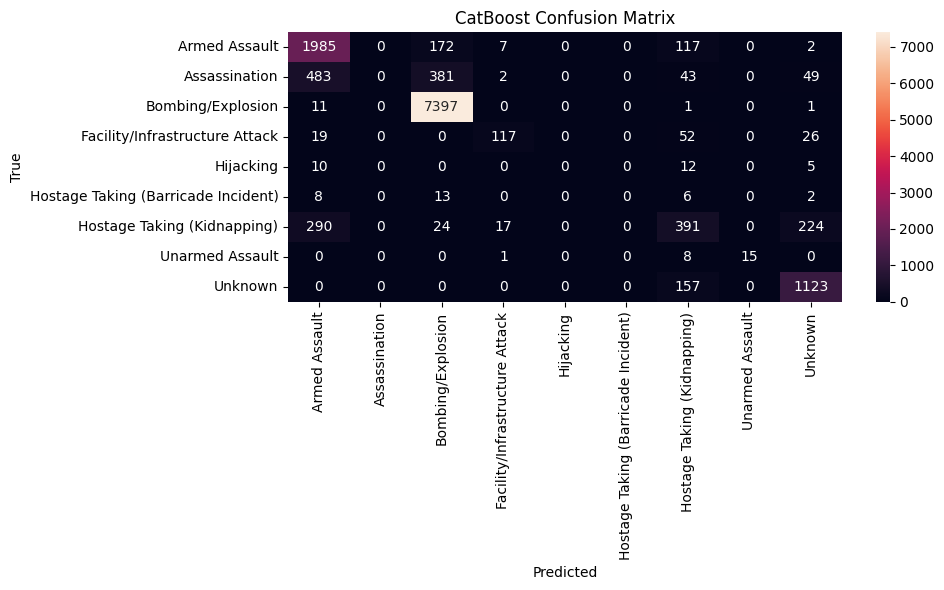

In [ ]:
# 10. 혼동 행렬 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_cat),
    annot=True,
    fmt='d',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title("CatBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

## tuned XGBoost

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

In [ ]:
# 1. 내전 국가 필터링
civil_war_countries = ["Syria", "Iraq", "Afghanistan", "Yemen", "Libya", "Somalia"]
df_civil = df[df['country_txt'].isin(civil_war_countries)].copy()

# 2. 사용할 열 정의 및 필터링
columns_to_use = [
    'iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
    'attacktype1_txt', 'weaptype1_txt', 'nkill', 'nwound'
]
df_model = df_civil[columns_to_use].dropna(subset=['attacktype1_txt']).copy()

# 3. 결측치 및 파생 변수 처리
df_model['nkill'] = df_model['nkill'].fillna(0)
df_model['nwound'] = df_model['nwound'].fillna(0)
df_model['casualties'] = df_model['nkill'] + df_model['nwound']

# 4. 날짜 처리
#df_model['imonth'] = df_model['imonth'].replace(0, 1)
#df_model['iday'] = df_model['iday'].replace(0, 1)
#df_model['date'] = pd.to_datetime(dict(year=df_model['iyear'], month=df_model['imonth'], day=df_model['iday']))

# 5. 범주형 변수 인코딩
categorical_cols = ['country_txt', 'region_txt', 'weaptype1_txt']
for col in categorical_cols:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

# 6. 타겟 라벨 인코딩
label_encoder = LabelEncoder()
df_model['attacktype_encoded'] = label_encoder.fit_transform(df_model['attacktype1_txt'])

# 7. 피처/타겟 정의
X = df_model[['country_txt', 'region_txt', 'weaptype1_txt', 'casualties']]
y = df_model['attacktype_encoded']

# 8. 훈련/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 9. SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 10. XGBoosting 모델 + GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6],
    'learning_rate': [0.05, 0.1]
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [02:41:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [4, 6],
                         'n_estimators': [100, 200]},
             scoring='f1_weighted', verbose=1)

In [ ]:
# 11. 예측 및 평가
best_model = grid_search.best_estimator_
y_pred_xgb_smote = best_model.predict(X_test)
evaluate_model("XGBoost + SMOTE + GridSearchCV", y_test, y_pred_xgb_smote)

print("📌 Best Parameters:", grid_search.best_params_)
print("\n🎯 Classification Report:")
print(classification_report(y_test, y_pred_xgb_smote, target_names=label_encoder.classes_))

📊 [XGBoost + SMOTE + GridSearchCV] Accuracy: 0.7453
🔁 F1 Macro: 0.4609
🔁 F1 Weighted: 0.7709
🧩 Confusion Matrix:
[[1492  419  139    6  127   24   59   15    2]
 [ 244  265  322    2   34   23   20    5   43]
 [  12  252 6579    0    2  550   10    4    1]
 [   7    0    0  116   38    3   27    0   23]
 [   4    2    0    0   17    0    2    1    1]
 [   2    2    8    0    2    6    6    1    2]
 [ 154   63   14   19  211   13  261   42  169]
 [   0    0    0    2    0    0    2   20    0]
 [   0    2    0    2   74    0  141    0 1061]]
📌 Best Parameters: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200}

🎯 Classification Report:
                                     precision    recall  f1-score   support

                      Armed Assault       0.78      0.65      0.71      2283
                      Assassination       0.26      0.28      0.27       958
                  Bombing/Explosion       0.93      0.89      0.91      7410
     Facility/Infrastructure Attack     

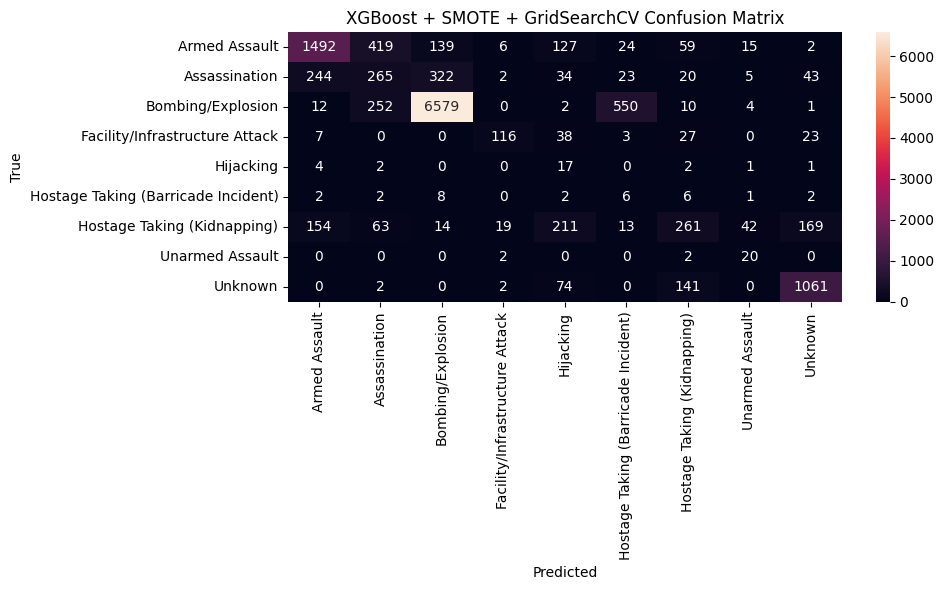

In [ ]:
# 12. 혼동 행렬 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_xgb_smote),
    annot=True,
    fmt='d',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title("XGBoost + SMOTE + GridSearchCV Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

## tuned Catboost

In [ ]:
# 1. 내전 국가 필터링
civil_war_countries = ["Syria", "Iraq", "Afghanistan", "Yemen", "Libya", "Somalia"]
df_civil = df[df['country_txt'].isin(civil_war_countries)].copy()

# 2. 사용할 열 정의 및 필터링
columns_to_use = [
    'iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
    'attacktype1_txt', 'weaptype1_txt', 'nkill', 'nwound'
]
df_model = df_civil[columns_to_use].dropna(subset=['attacktype1_txt']).copy()

# 3. 결측치 및 파생 변수 처리
df_model['nkill'] = df_model['nkill'].fillna(0)
df_model['nwound'] = df_model['nwound'].fillna(0)
df_model['casualties'] = df_model['nkill'] + df_model['nwound']

# 4. 날짜 처리
df_model['imonth'] = df_model['imonth'].replace(0, 1)
df_model['iday'] = df_model['iday'].replace(0, 1)
df_model['date'] = pd.to_datetime(dict(year=df_model['iyear'], month=df_model['imonth'], day=df_model['iday']))

# 5. 타겟 라벨 인코딩
label_encoder = LabelEncoder()
df_model['attacktype_encoded'] = label_encoder.fit_transform(df_model['attacktype1_txt'])

# 6. CatBoost는 범주형 변수 이름으로 처리
X = df_model[['country_txt', 'region_txt', 'weaptype1_txt', 'casualties']]
y = df_model['attacktype_encoded']
cat_features = ['country_txt', 'region_txt', 'weaptype1_txt']

# 7. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 8. 범주형 변수는 숫자로 인코딩 (SMOTE를 위해 필요)
for col in cat_features:
    X_train[col] = LabelEncoder().fit_transform(X_train[col])
    X_test[col] = LabelEncoder().fit_transform(X_test[col])

# 9. SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 10. CatBoosting 모델 + GridSearchCV
cat_clf = CatBoostClassifier(verbose=0, random_state=42)

param_grid = {
    'iterations': [100, 200],
    'depth': [4, 6],
    'learning_rate': [0.05, 0.1]
}

grid_search = GridSearchCV(
    estimator=cat_clf,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=3,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f6a6cf69010>,
             n_jobs=-1,
             param_grid={'depth': [4, 6], 'iterations': [100, 200],
                         'learning_rate': [0.05, 0.1]},
             scoring='f1_weighted', verbose=1)

In [ ]:
# 11. 예측 및 평가
best_model = grid_search.best_estimator_
y_pred_cat_smote = best_model.predict(X_test)
evaluate_model("CatBoost + SMOTE + GridSearchCV", y_test, y_pred_cat_smote)

print("📌 Best Parameters:", grid_search.best_params_)
print("\n🎯 Classification Report:")
print(classification_report(y_test, y_pred_cat_smote, target_names=label_encoder.classes_))

📌 Best Parameters: {'depth': 6, 'iterations': 200, 'learning_rate': 0.1}

🎯 Classification Report:
                                     precision    recall  f1-score   support

                      Armed Assault       0.78      0.65      0.71      2283
                      Assassination       0.28      0.27      0.27       958
                  Bombing/Explosion       0.93      0.90      0.91      7410
     Facility/Infrastructure Attack       0.80      0.55      0.65       214
                          Hijacking       0.04      0.59      0.07        27
Hostage Taking (Barricade Incident)       0.01      0.28      0.02        29
        Hostage Taking (Kidnapping)       0.50      0.27      0.35       946
                    Unarmed Assault       0.19      0.79      0.30        24
                            Unknown       0.81      0.83      0.82      1280

                           accuracy                           0.75     13171
                          macro avg       0.48      

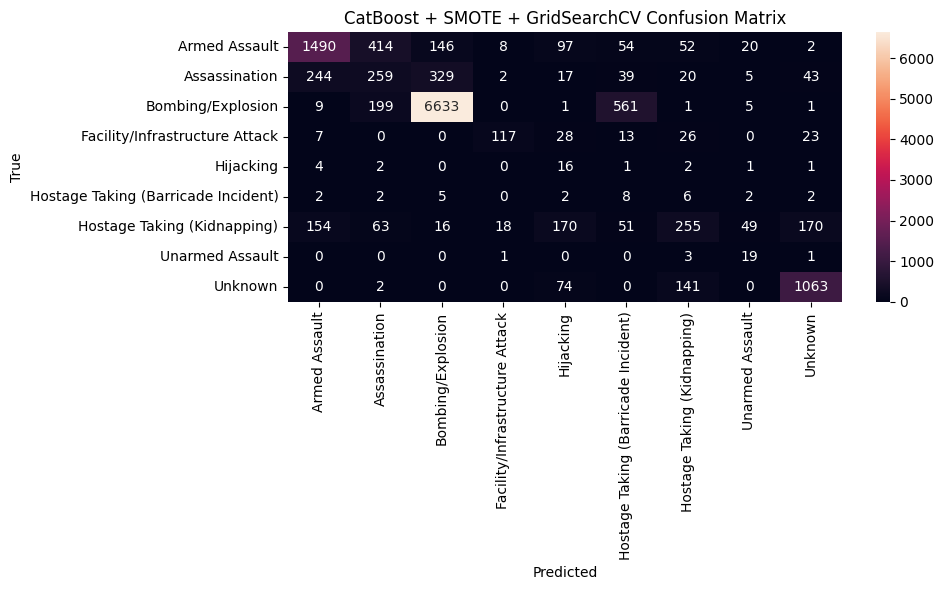

In [ ]:
# 12. 혼동 행렬 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_cat_smote),
    annot=True,
    fmt='d',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title("CatBoost + SMOTE + GridSearchCV Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

## GradientBoost

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. 모델 정의 및 학습
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

gb_model.fit(X_train, y_train)

# 2. 예측
y_pred_gb = gb_model.predict(X_test)

# 3. 평가 저장
evaluate_model("Gradient Boosting", y_test, y_pred_gb)

📊 [Gradient Boosting] Accuracy: 0.8377
🔁 F1 Macro: 0.4868
🔁 F1 Weighted: 0.8029
🧩 Confusion Matrix:
[[1975   11  172    8    0    0  115    0    2]
 [ 470   13  381    2    0    0   43    0   49]
 [  11    0 7395    0    0    1    1    1    1]
 [  19    0    0  120    0    0   49    0   26]
 [  10    0    0    0    0    0   12    0    5]
 [   8    0   13    0    0    0    6    0    2]
 [ 285    5   23   17    0    0  393    3  220]
 [   1    0    2    1    0    0    6   14    0]
 [   0    0    0    0    0    0  157    0 1123]]


In [ ]:
# 4. 리포트 출력
print("🎯 [Gradient Boosting] Classification Report")
print(classification_report(y_test, y_pred_gb, target_names=label_encoder.classes_))

🎯 [Gradient Boosting] Classification Report
                                     precision    recall  f1-score   support

                      Armed Assault       0.71      0.87      0.78      2283
                      Assassination       0.45      0.01      0.03       958
                  Bombing/Explosion       0.93      1.00      0.96      7410
     Facility/Infrastructure Attack       0.81      0.56      0.66       214
                          Hijacking       0.00      0.00      0.00        27
Hostage Taking (Barricade Incident)       0.00      0.00      0.00        29
        Hostage Taking (Kidnapping)       0.50      0.42      0.45       946
                    Unarmed Assault       0.78      0.58      0.67        24
                            Unknown       0.79      0.88      0.83      1280

                           accuracy                           0.84     13171
                          macro avg       0.55      0.48      0.49     13171
                       weighte

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


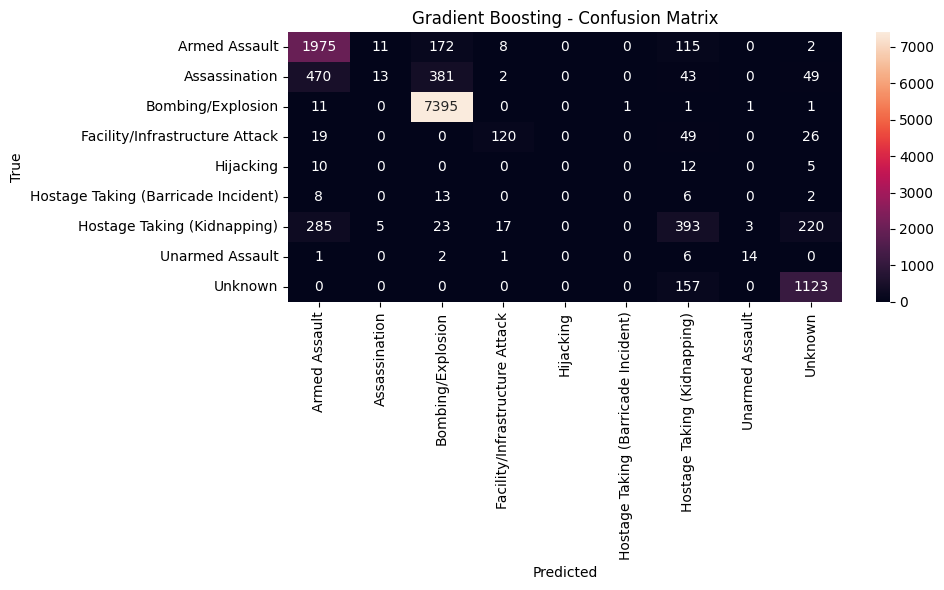

In [ ]:
# 5. 혼동 행렬 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_gb),
    annot=True,
    fmt='d',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title("Gradient Boosting - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

## tuned GradientBoost

In [ ]:
# 1. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 2. SMOTE 적용
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. GridSearch용 파라미터 정의
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5]
}

# 4. Gradient Boosting 모델 + GridSearchCV
gb_clf = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=gb_clf,
    param_grid=param_grid,
    scoring='f1_weighted',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 200]},
             scoring='f1_weighted', verbose=1)

In [ ]:
# 5. 최적 모델로 예측
best_gb_model = grid_search.best_estimator_
y_pred_gb_tuned = best_gb_model.predict(X_test)

# 6. 평가 저장
evaluate_model("Gradient Boosting + SMOTE + GridSearchCV", y_test, y_pred_gb_tuned)

# 7. 리포트 출력
print("📊 [Gradient Boosting + SMOTE + GridSearchCV] 최적 파라미터:")
print(grid_search.best_params_)

print("\n📘 Classification Report (Test Set):")
print(classification_report(y_test, y_pred_gb_tuned, target_names=label_encoder.classes_))

📊 [Gradient Boosting + SMOTE + GridSearchCV] 최적 파라미터:
{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}

📘 Classification Report (Test Set):
                                     precision    recall  f1-score   support

                      Armed Assault       0.78      0.66      0.71      2283
                      Assassination       0.26      0.28      0.27       958
                  Bombing/Explosion       0.93      0.91      0.92      7410
     Facility/Infrastructure Attack       0.80      0.55      0.65       214
                          Hijacking       0.04      0.59      0.07        27
Hostage Taking (Barricade Incident)       0.01      0.10      0.01        29
        Hostage Taking (Kidnapping)       0.50      0.28      0.36       946
                    Unarmed Assault       0.22      0.75      0.34        24
                            Unknown       0.81      0.83      0.82      1280

                           accuracy                           0.76     13171


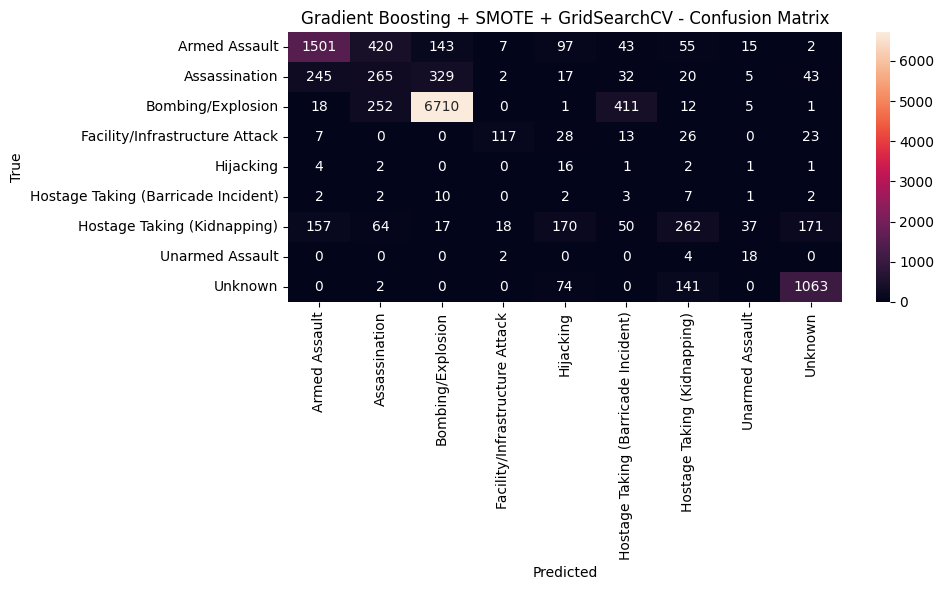

In [ ]:
# 8. 혼동 행렬 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_gb_tuned),
    annot=True,
    fmt='d',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title("Gradient Boosting + SMOTE + GridSearchCV - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

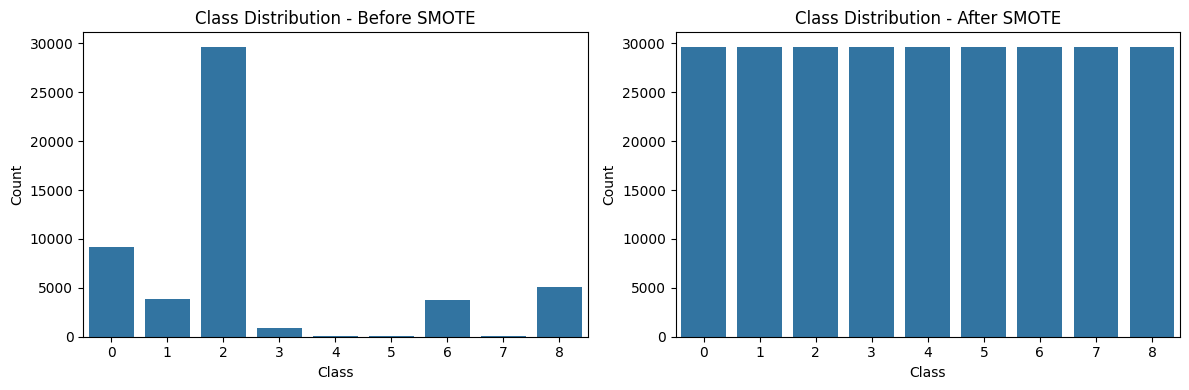

In [ ]:
# SMOTE 전: 원래 훈련 데이터
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, order=sorted(y_train.unique()))
plt.title("Class Distribution - Before SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")

# SMOTE 후: 리샘플된 훈련 데이터
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_resampled)
plt.title("Class Distribution - After SMOTE")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. 모델 정의 및 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# 2. 예측
y_pred_rf = rf_model.predict(X_test)

# 3. 평가 저장
evaluate_model("Random Forest", y_test, y_pred_rf)

# 4. 리포트 출력
print("📊 [Random Forest] Classification Report")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

📊 [Random Forest] Accuracy: 0.8374
🔁 F1 Macro: 0.4963
🔁 F1 Weighted: 0.8050
🧩 Confusion Matrix:
[[1928   12  172    9    0    0  160    0    2]
 [ 462   16  381    2    0    0   51    0   46]
 [  15    3 7385    0    0    1    4    1    1]
 [  15    0    0  114    0    0   58    1   26]
 [   9    0    0    0    0    0   12    1    5]
 [   5    0   13    0    0    0    9    0    2]
 [ 224   11   22   18    1    3  453    0  214]
 [   0    0    0    1    0    0    6   16    1]
 [   0    2    0    2    0    0  159    0 1117]]
📊 [Random Forest] Classification Report
                                     precision    recall  f1-score   support

                      Armed Assault       0.73      0.84      0.78      2283
                      Assassination       0.36      0.02      0.03       958
                  Bombing/Explosion       0.93      1.00      0.96      7410
     Facility/Infrastructure Attack       0.78      0.53      0.63       214
                          Hijacking       0.0

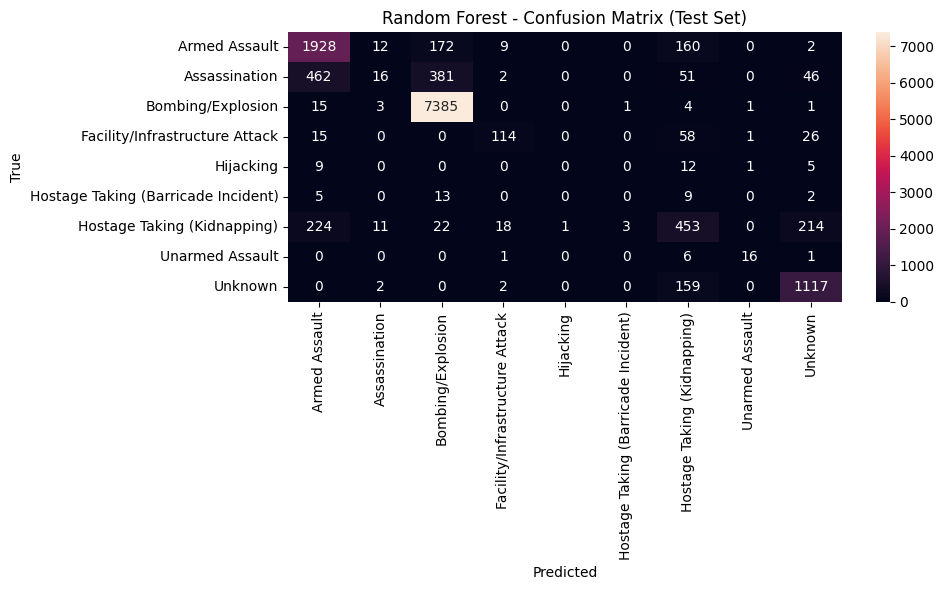

In [ ]:
# 5. 혼동 행렬 시각화
plt.figure(figsize=(10, 6))
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf),
    annot=True,
    fmt='d',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.title("Random Forest - Confusion Matrix (Test Set)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.tight_layout()
plt.show()

## AdaBoost

In [ ]:
# 1. 사용할 열 정의
columns_to_use = [
    'iyear', 'imonth', 'iday', 'country_txt', 'region_txt',
    'attacktype1_txt', 'weaptype1_txt', 'nkill', 'nwound'
]

# 2. 데이터 필터링 및 복사
df_model = df_civil[columns_to_use].dropna(subset=['attacktype1_txt']).copy()

# 3. 결측치 처리
df_model['nkill'] = df_model['nkill'].fillna(0)
df_model['nwound'] = df_model['nwound'].fillna(0)
df_model['casualties'] = df_model['nkill'] + df_model['nwound']

# 4. 날짜 처리 (0월 또는 0일 → 1일로 대체)
#df_model['imonth'] = df_model['imonth'].replace(0, 1)
#df_model['iday'] = df_model['iday'].replace(0, 1)
#df_model['date'] = pd.to_datetime(dict(year=df_model['iyear'], month=df_model['imonth'], day=df_model['iday']))

# 5. 범주형 변수 인코딩
categorical_cols = ['country_txt', 'region_txt', 'weaptype1_txt']
for col in categorical_cols:
    df_model[col] = LabelEncoder().fit_transform(df_model[col])

# 6. 타겟 라벨 인코딩
label_encoder = LabelEncoder()
df_model['attacktype_encoded'] = label_encoder.fit_transform(df_model['attacktype1_txt'])

# 7. 피처 및 타겟 정의
X = df_model[['country_txt', 'region_txt', 'weaptype1_txt', 'casualties']]
y = df_model['attacktype_encoded']

# 8. 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 9. AdaBoost 모델 학습
from sklearn.ensemble import AdaBoostClassifier

ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)

# 10. 예측 및 평가
y_pred_ada = ada_model.predict(X_test)
evaluate_model("AdaBoost", y_test, y_pred_xgb_smote)

print("🎯 Classification Report:")
print(classification_report(y_test, y_pred_ada, target_names=label_encoder.classes_))

📊 [AdaBoost] Accuracy: 0.7453
🔁 F1 Macro: 0.4609
🔁 F1 Weighted: 0.7709
🧩 Confusion Matrix:
[[1492  419  139    6  127   24   59   15    2]
 [ 244  265  322    2   34   23   20    5   43]
 [  12  252 6579    0    2  550   10    4    1]
 [   7    0    0  116   38    3   27    0   23]
 [   4    2    0    0   17    0    2    1    1]
 [   2    2    8    0    2    6    6    1    2]
 [ 154   63   14   19  211   13  261   42  169]
 [   0    0    0    2    0    0    2   20    0]
 [   0    2    0    2   74    0  141    0 1061]]
🎯 Classification Report:
                                     precision    recall  f1-score   support

                      Armed Assault       0.67      0.91      0.77      2283
                      Assassination       0.06      0.01      0.01       958
                  Bombing/Explosion       0.92      1.00      0.96      7410
     Facility/Infrastructure Attack       0.84      0.43      0.57       214
                          Hijacking       0.00      0.00      0.0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## 성능비교

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# 결과 저장용 리스트 (최상단에 선언)
results = []

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1_macro = f1_score(y_true, y_pred, average='macro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')

    print(f"📊 [{name}] Accuracy: {acc:.4f}")
    print(f"🔁 F1 Macro: {f1_macro:.4f}")
    print(f"🔁 F1 Weighted: {f1_weighted:.4f}")
    print(f"🧩 Confusion Matrix:\n{confusion_matrix(y_true, y_pred)}")

    # 결과 저장
    results.append({
        "Model": name,
        "Accuracy": acc,
        "F1_macro": f1_macro,
        "F1_weighted": f1_weighted
    })

In [ ]:
results

[{'Model': 'XGBoost',
  'Accuracy': 0.8390403158454179,
  'F1_macro': 0.4974122318420719,
  'F1_weighted': 0.8061898149522981},
 {'Model': 'CatBoost',
  'Accuracy': 0.8372940551210993,
  'F1_macro': 0.49369158518843637,
  'F1_weighted': 0.8007038280014567},
 {'Model': 'XGBoost + SMOTE + GridSearchCV',
  'Accuracy': 0.7453496317667603,
  'F1_macro': 0.46091399116068005,
  'F1_weighted': 0.7709349536189161},
 {'Model': 'Gradient Boosting',
  'Accuracy': 0.8376736770176904,
  'F1_macro': 0.4868012390810599,
  'F1_weighted': 0.802889190807791},
 {'Model': 'Random Forest',
  'Accuracy': 0.8373699795004176,
  'F1_macro': 0.49632071456691335,
  'F1_weighted': 0.8050344921325586},
 {'Model': 'AdaBoost',
  'Accuracy': 0.7453496317667603,
  'F1_macro': 0.46091399116068005,
  'F1_weighted': 0.7709349536189161}]